# START

In [1]:
import os
import pandas as pd
import string as st
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from scipy.stats import zscore

# pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# 1/ OUVERTURE DES FICHIERS

In [2]:
#On ouvre les fichiers
path_p = "C:/Users/Anwender/Desktop/openclassroom/projet_5"
parent = os.listdir(path_p)
l_docs = []

for i in parent:
    path_data = os.path.join(path_p,i)
    n = i.replace('.csv','')
    n = n.replace('_dataset','')
    n = n.replace('olist_','')
    locals()['{}'.format(n)] = pd.read_csv(path_data,sep=',',lineterminator='\n')

#On modifie le nom des fichiers 
# len('_dataset.csv')/
n = parent[0].replace('_dataset.csv','')
n = n.replace('olist_','')
parent

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [3]:
docs = parent
for j in range(len(parent)):
    parent[j] = parent[j].replace('.csv','')
    parent[j] = parent[j].replace('_dataset','')
    parent[j] = parent[j].replace('olist_','')
parent

['customers',
 'geolocation',
 'orders',
 'order_items',
 'order_payments',
 'order_reviews',
 'products',
 'sellers',
 'product_category_name_translation']

# 2/ OBSERVATION DES TABLES ET VARIABLES

(99441, 5)
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
(1000163, 5)
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
(99441, 8)
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
(112650, 7)
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
(103886, 5)
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
(100000, 7)
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'revi

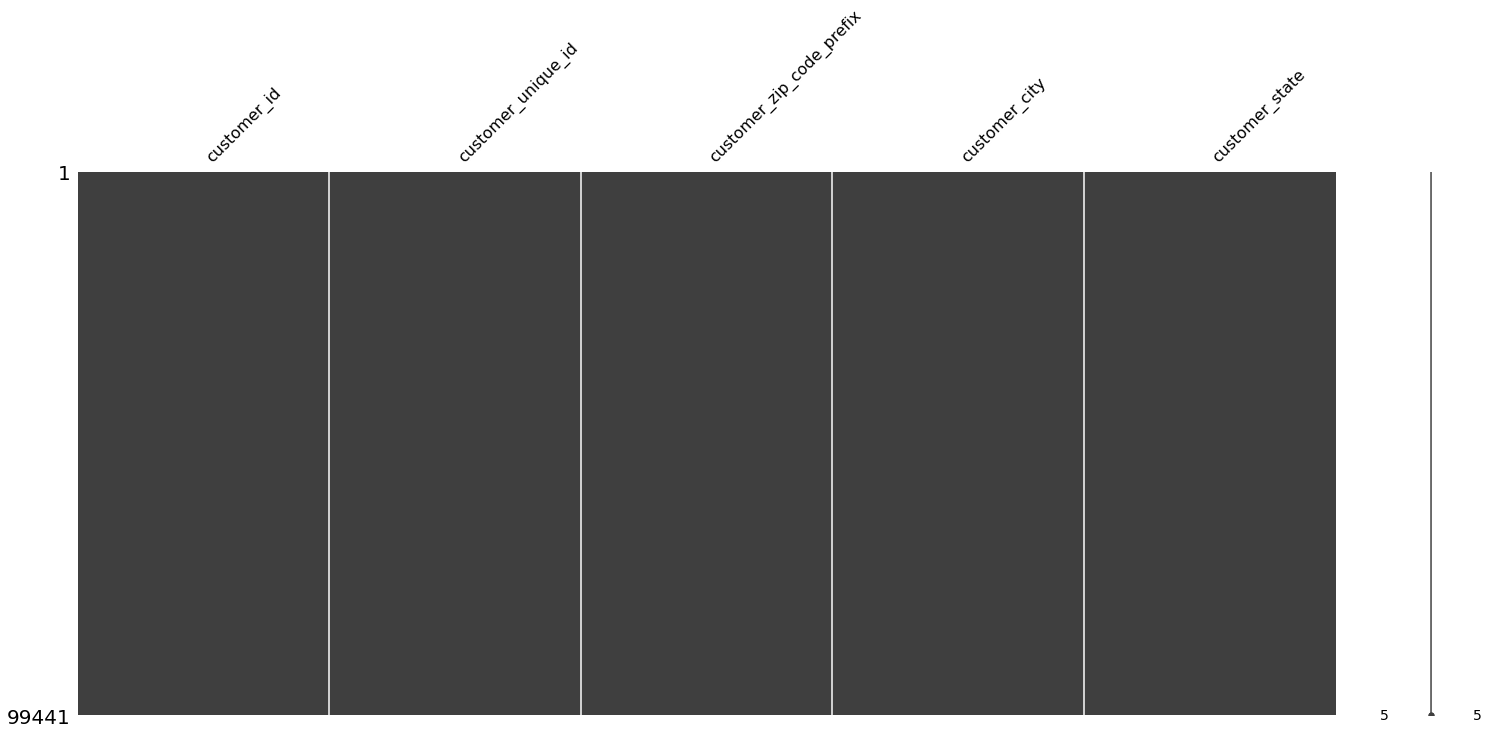

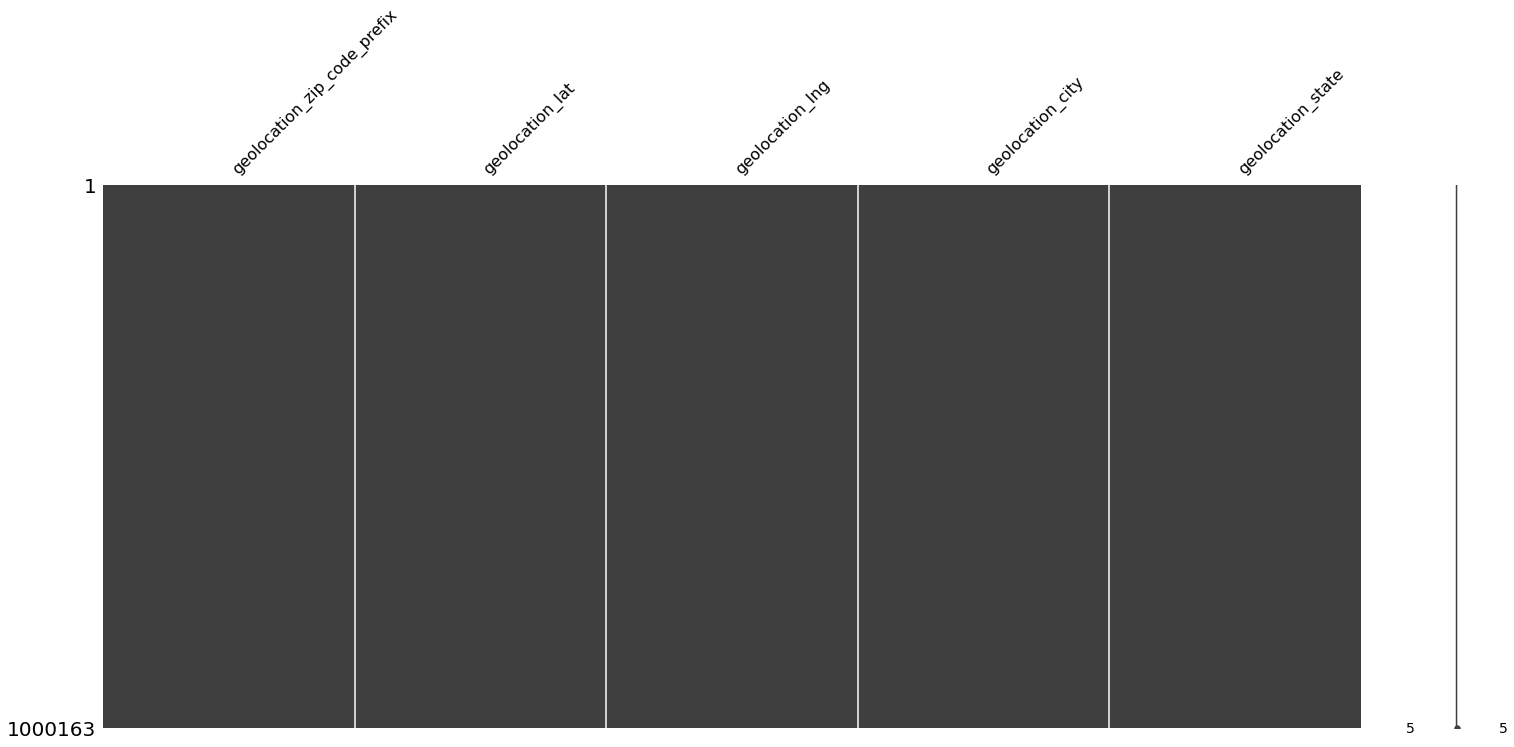

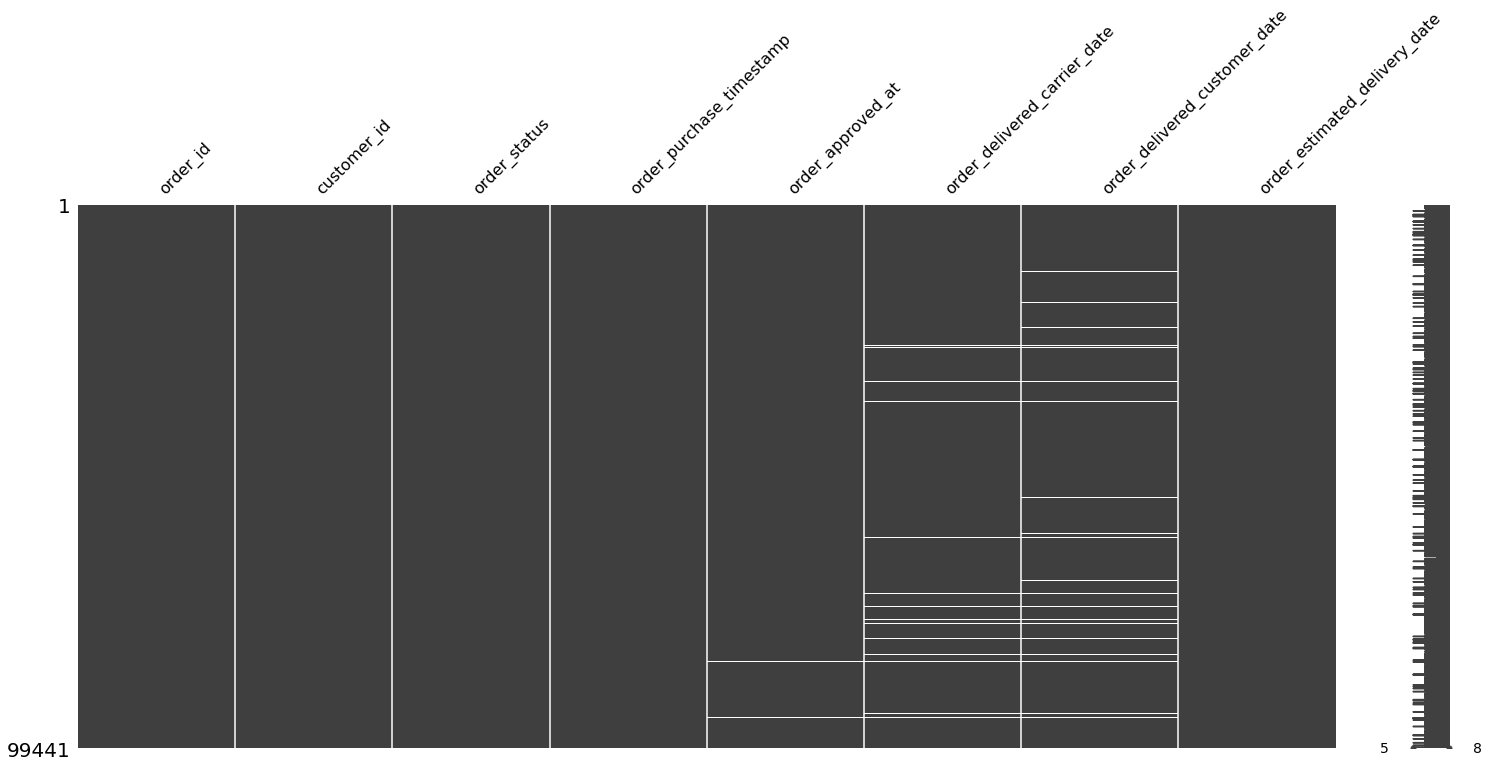

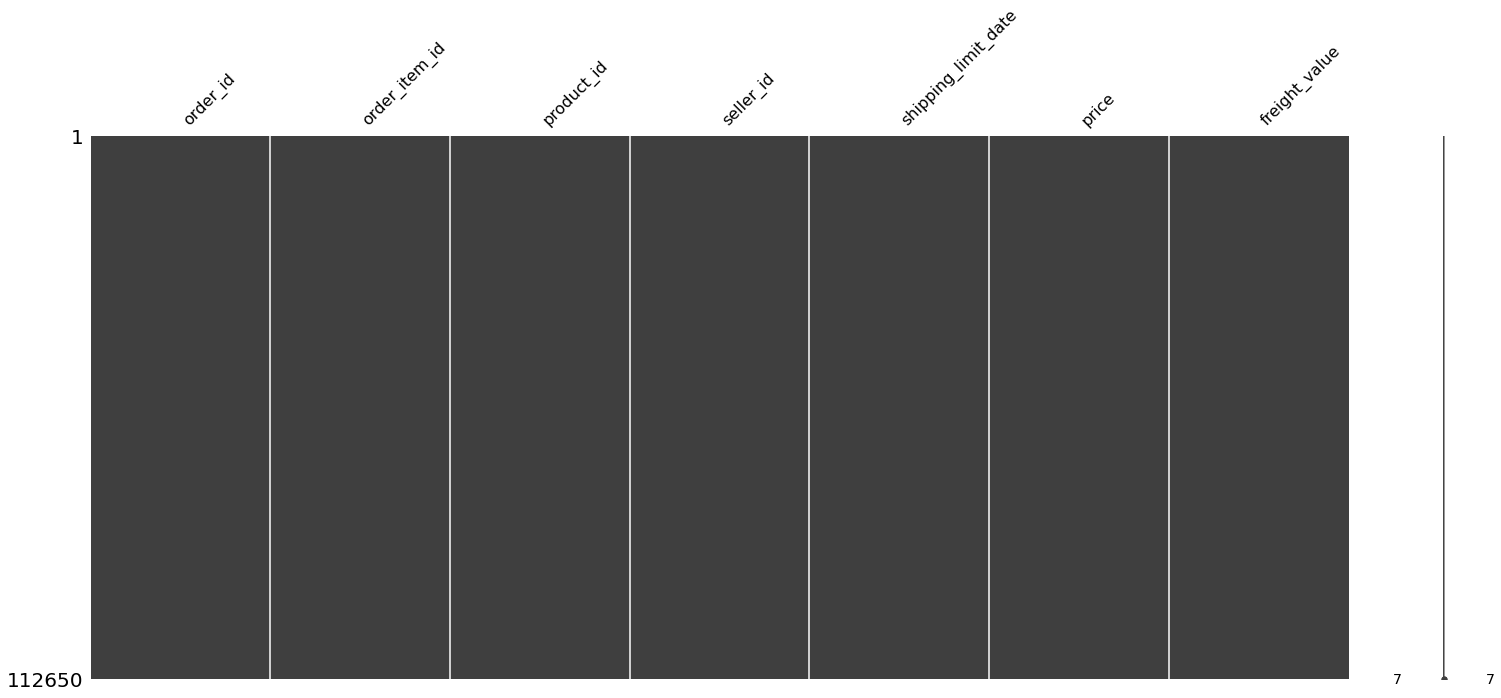

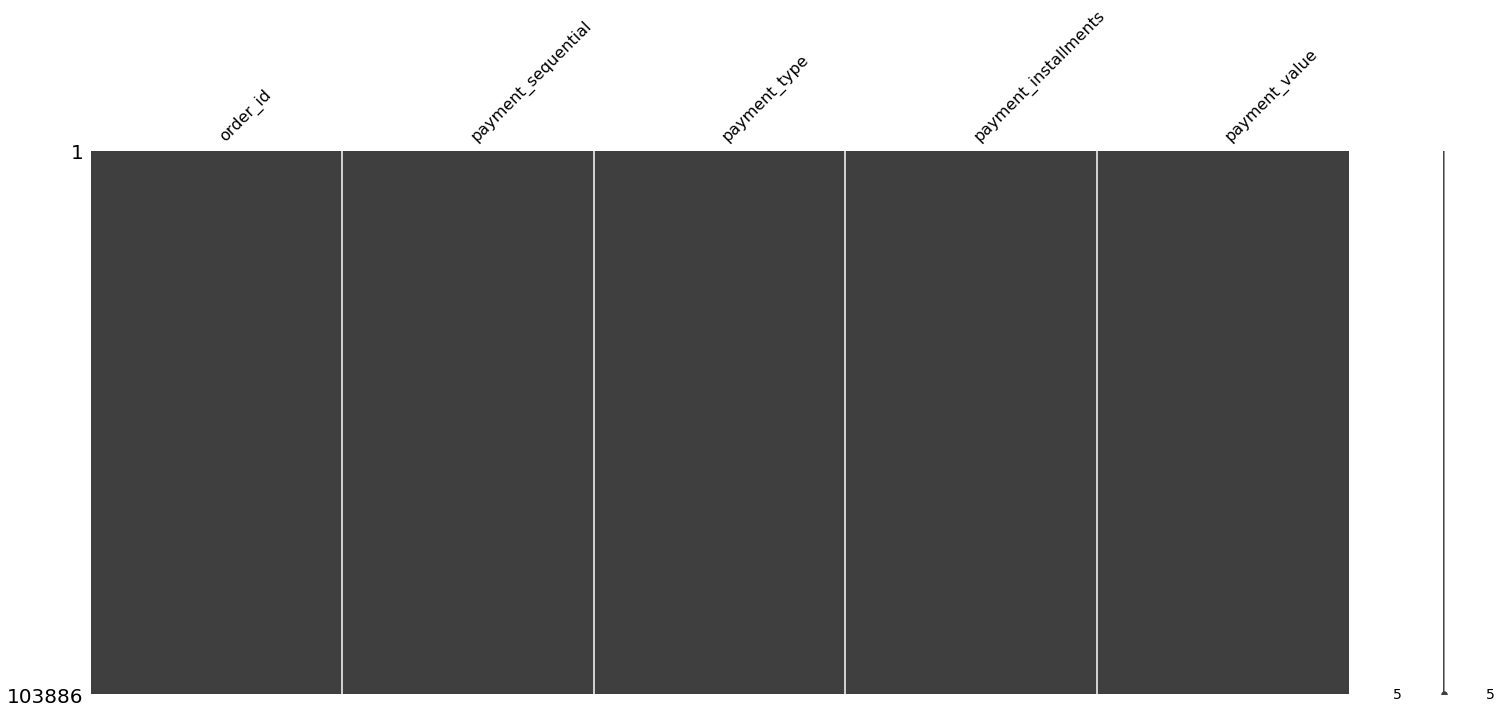

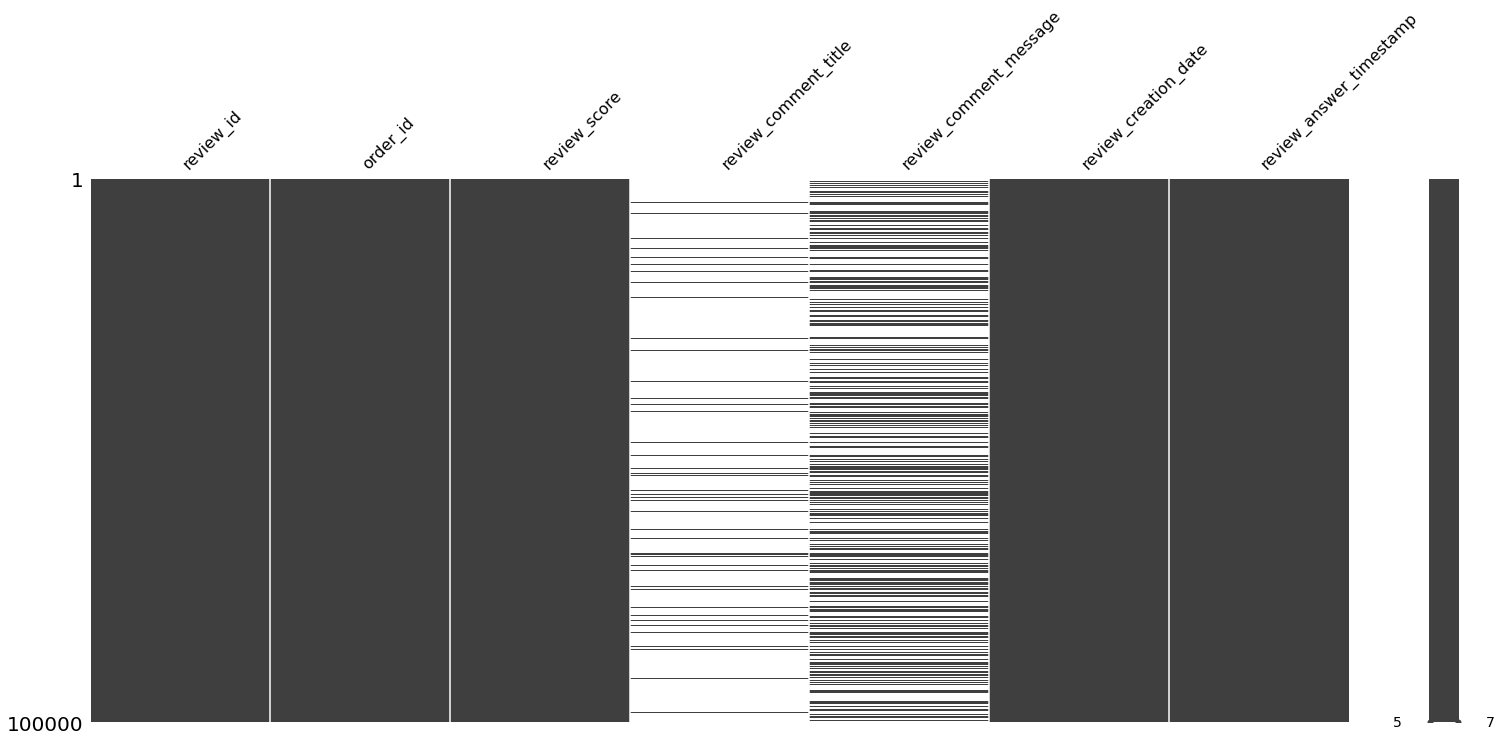

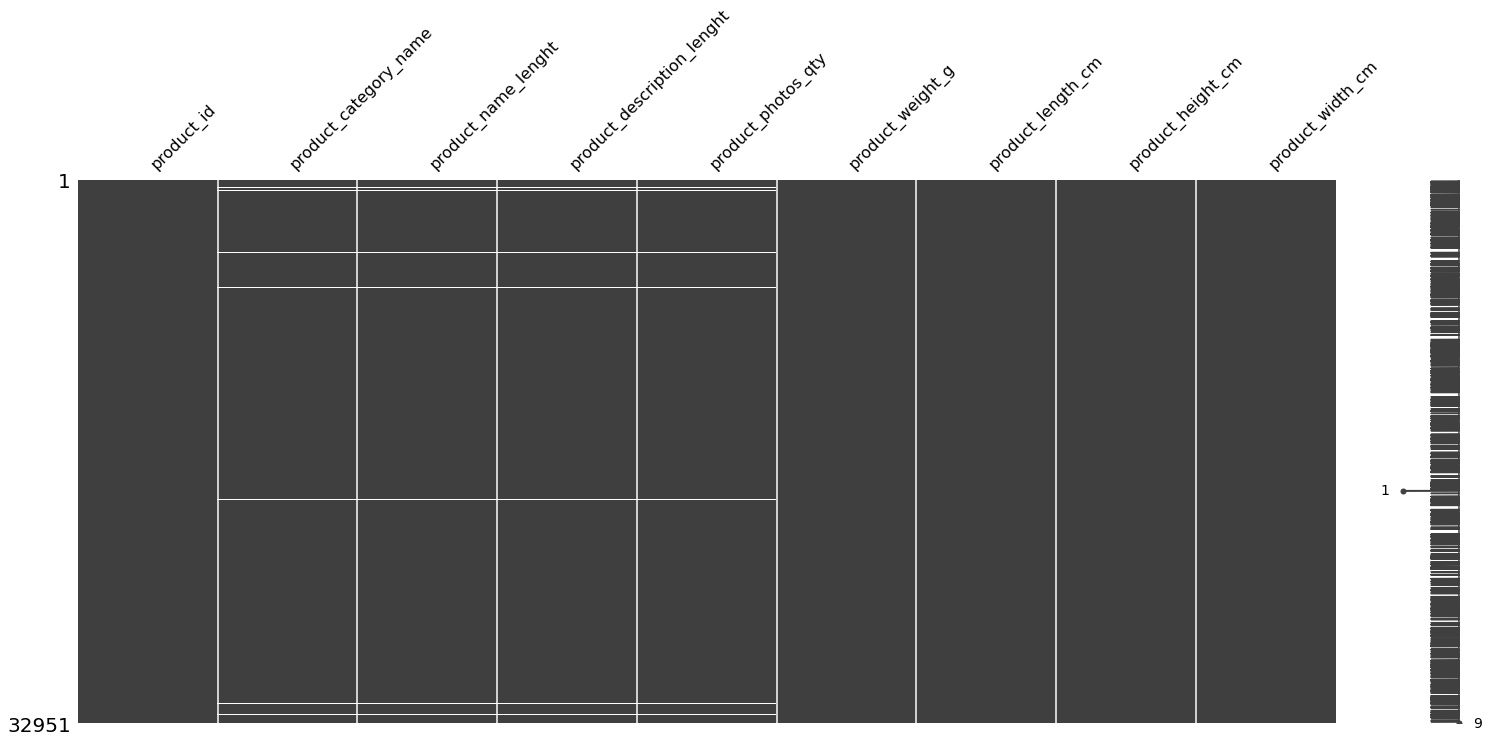

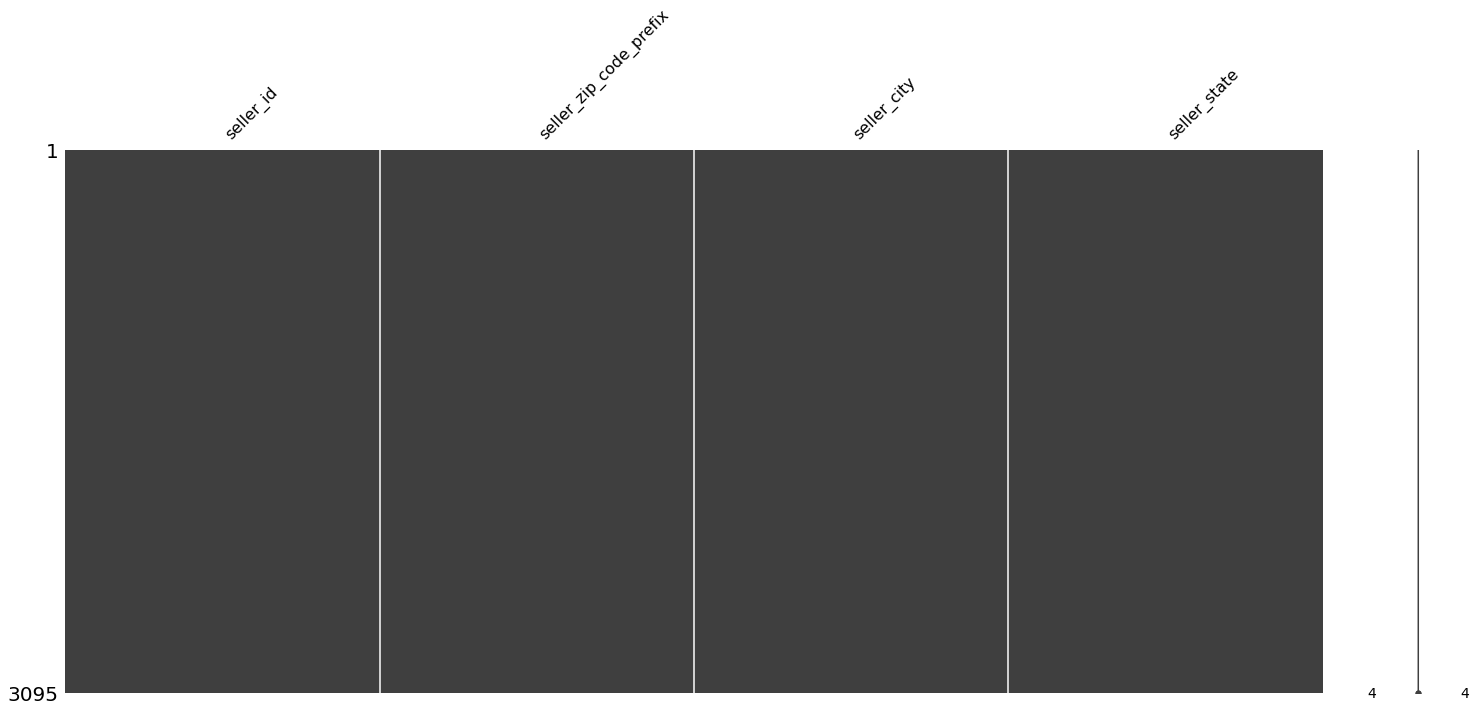

C:\Users\Anwender\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anwender\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


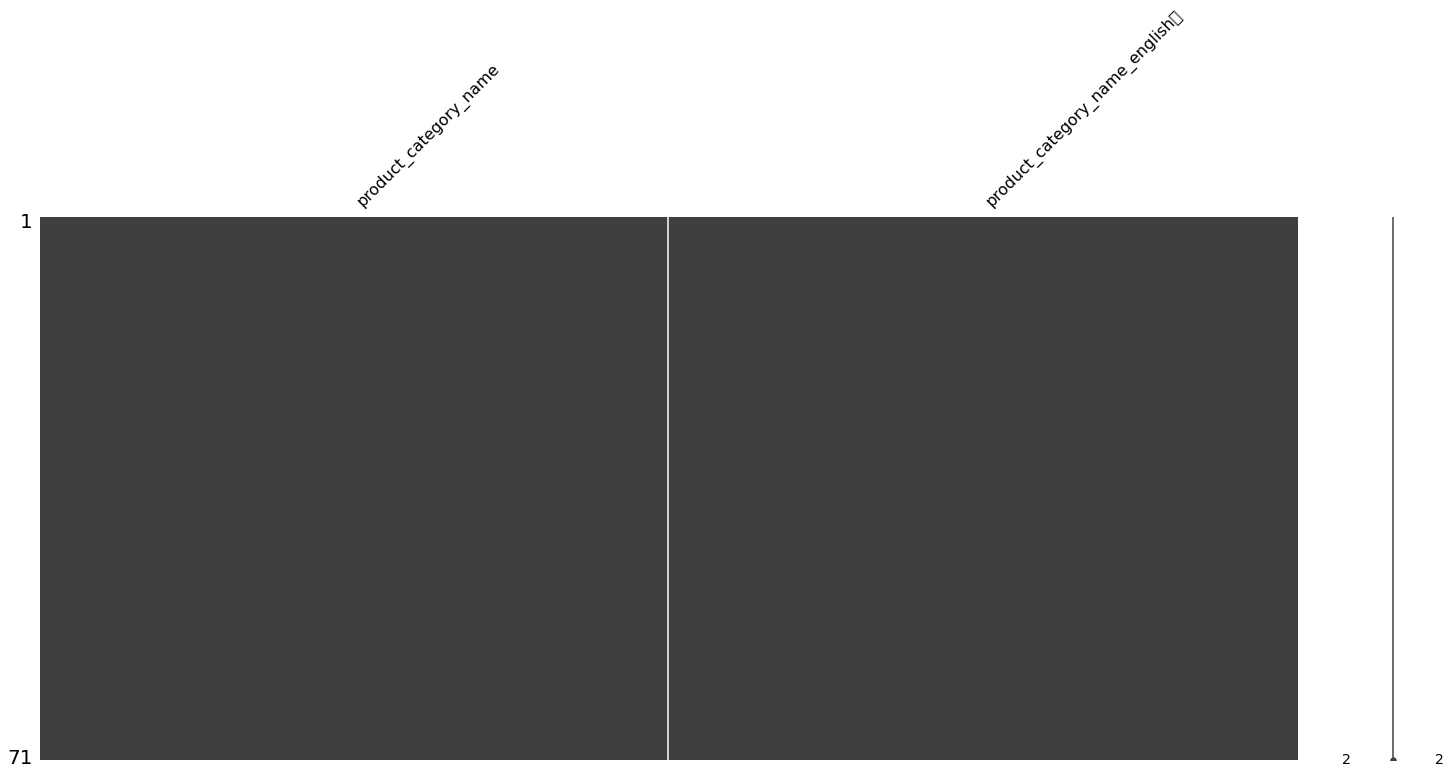

In [4]:
#Observation rapide des noms de variable et de la forme des données

for i in parent:
    print(locals()['{}'.format(i)].shape)
    print(locals()['{}'.format(i)].columns)
    msno.matrix(locals()['{}'.format(i)])

### Quelles sont les variables communes?

In [5]:
parent_drop = parent
connection_table = pd.DataFrame(data=[], index=parent, columns=parent)

for i in parent:
    for j in parent:
        if i!=j:
            connection_table.loc[i, j] = np.intersect1d(locals()['{}'.format(i)].columns, 
                                                        locals()['{}'.format(j)].columns)
        else:
            connection_table.loc[i, j] = "NI"
connection_table

,customers,geolocation,orders,order_items,order_payments,order_reviews,products,sellers,product_category_name_translation
customers,NI,[],[customer_id],[],[],[],[],[],[]
geolocation,[],NI,[],[],[],[],[],[],[]
orders,[customer_id],[],NI,[order_id],[order_id],[order_id],[],[],[]
order_items,[],[],[order_id],NI,[order_id],[order_id],[product_id],[seller_id],[]
order_payments,[],[],[order_id],[order_id],NI,[order_id],[],[],[]
order_reviews,[],[],[order_id],[order_id],[order_id],NI,[],[],[]
products,[],[],[],[product_id],[],[],NI,[],[product_category_name]
sellers,[],[],[],[seller_id],[],[],[],NI,[]
product_category_name_translation,[],[],[],[],[],[],[product_category_name],[],NI


# 3/ ETUDE DU POINT DE VUE CUSTOMER

## Merge sur les différentes tables

113425
118434
119151


C:\Users\Anwender\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anwender\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


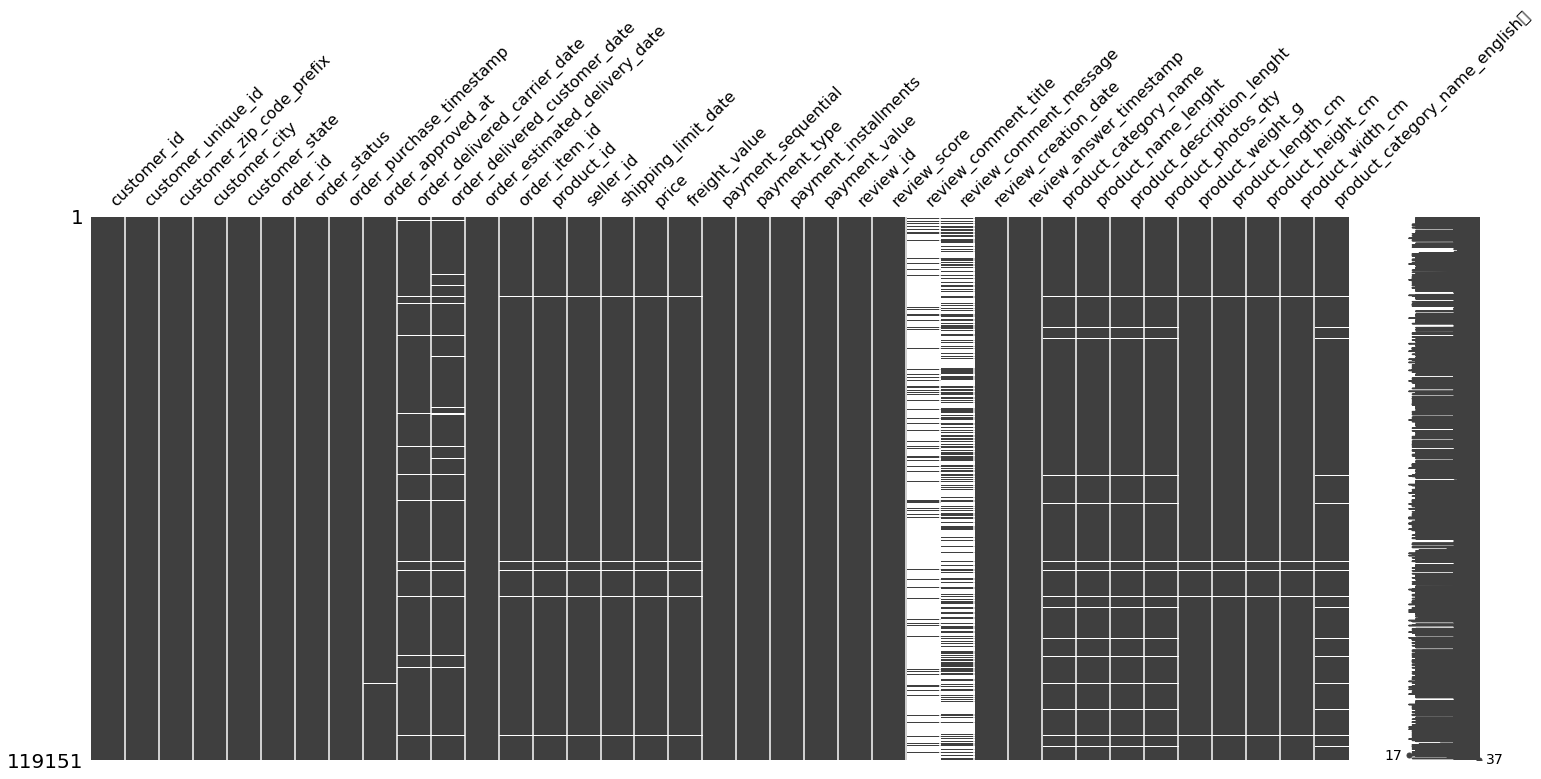

In [6]:
customer_study = customers.merge(orders, how = "left", on="customer_id")

for dataset in [order_items, order_payments, order_reviews]:
    customer_study = customer_study.merge(dataset, how="left", on="order_id")
    print(customer_study.index.size)
    
customer_study = customer_study.merge(products, how="left", on="product_id")
# customer_study = customer_study.merge(sellers, how="left", on="seller_id")
customer_study = customer_study.merge(product_category_name_translation, how="left", on="product_category_name")
customer_study.to_csv("customer_study")
msno.matrix(customer_study)

In [7]:
customer_study["order_purchase_timestamp"].min()

'2016-09-04 21:15:19'

### Ratio de données manquantes

<BarContainer object of 37 artists>

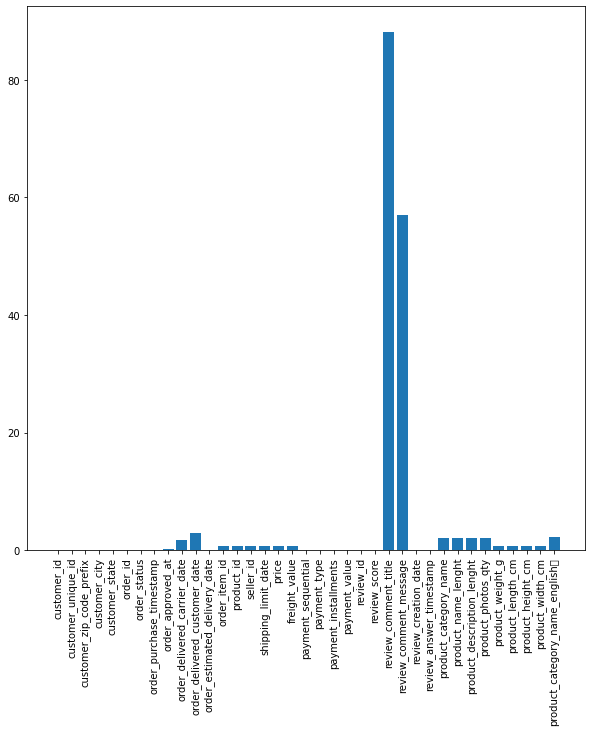

In [8]:
# customer_study = customer_study.drop(columns=["review_comment_title","review_comment_message"])
nrow = customer_study.iloc[:,0].size
ratio_missing = customer_study.apply(lambda x: x.isna().sum(), axis=0)
ratio_missing = round(ratio_missing*100/nrow, 2)
fig = plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.bar(x = ratio_missing.index, height=ratio_missing)

#### On peut observer un grand nombre de données manquantes. Mais avant de traiter cela, créons la table de feature que nous voulons étudier.

# 4/ Customers features table

#### Créons un dataframe vide

In [9]:
customer_feature = pd.DataFrame()

#### Ajoutons les id de nos customers en un seul exemplaire

In [10]:
customer_feature["customer_unique_id"] = customer_study.iloc[:,0].unique()
customer_feature.iloc[0:3,:]

,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7
1,18955e83d337fd6b2def6b18a428ac77
2,4e7b3e00288586ebd08712fdd0374a03


In [11]:
customer_feature.size

99441

## Ajoutons des features intéressante: 

### Le nombre de produits achetés

In [12]:
customer_study["order_item_id"].value_counts()

1.0     103653
2.0      10317
3.0       2396
4.0        995
5.0        472
6.0        265
7.0         61
8.0         37
9.0         29
10.0        26
11.0        18
12.0        13
13.0         8
14.0         7
15.0         5
20.0         3
17.0         3
19.0         3
18.0         3
16.0         3
21.0         1
Name: order_item_id, dtype: int64

#### On somme  en groupant par l'ID des customers

In [13]:
n_product_count = round(customer_study.loc[:,["customer_unique_id", "order_item_id"]].groupby(["customer_unique_id"]).sum(), 2)
n_product_count

,order_item_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0
0000f46a3911fa3c0805444483337064,1.0
0000f6ccb0745a6a4b88665a16c9f078,1.0
0004aac84e0df4da2b147fca70cf8255,1.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,3.0
fffea47cd6d3cc0a88bd621562a9d061,1.0
ffff371b4d645b6ecea244b27531430a,1.0


#### On peut classer ASC pour la première variable de la table feature 

In [14]:
n_product_count = n_product_count.sort_values(by="order_item_id", ascending=False)
n_product_count

,order_item_id
customer_unique_id,
4546caea018ad8c692964e3382debd19,231.0
c402f431464c72e27330a67f7b94d4fb,210.0
698e1cf81d01a3d389d96145f7fa6df8,210.0
9a736b248f67d166d2fbb006bcb877c3,138.0
d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0
...,...
391d6062da3dd65b4de4524f28c478de,0.0
962187a437025c984c621276aad55fb8,0.0
d04b8fd0acfc725ef9186b1e3d121cf0,0.0


#### On passe l'ID en tant que variable

In [15]:
n_product_count = n_product_count.reset_index(level=[0,0])
n_product_count

,customer_unique_id,order_item_id
0,4546caea018ad8c692964e3382debd19,231.0
1,c402f431464c72e27330a67f7b94d4fb,210.0
2,698e1cf81d01a3d389d96145f7fa6df8,210.0
3,9a736b248f67d166d2fbb006bcb877c3,138.0
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0
...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0
96092,962187a437025c984c621276aad55fb8,0.0
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0
96094,54975068b3fb2924fded7c27eb31b54f,0.0


#### On sauvegarde la base de notre table et l'on renomme la variable

In [16]:
customer_feature = n_product_count
customer_feature = customer_feature.rename(columns={"order_item_id": "nb_product_bought"})
customer_feature

,customer_unique_id,nb_product_bought
0,4546caea018ad8c692964e3382debd19,231.0
1,c402f431464c72e27330a67f7b94d4fb,210.0
2,698e1cf81d01a3d389d96145f7fa6df8,210.0
3,9a736b248f67d166d2fbb006bcb877c3,138.0
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0
...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0
96092,962187a437025c984c621276aad55fb8,0.0
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0
96094,54975068b3fb2924fded7c27eb31b54f,0.0


### Le nombre de commandes passées

#### On crée la table en comptant le nombre de commandes par customer

In [17]:
customer_nb_order = customer_study.loc[:,["customer_unique_id", "order_id"]].groupby("customer_unique_id").count()             
customer_nb_order = customer_nb_order.sort_values(by="order_id", ascending=False)
customer_nb_order = customer_nb_order.reset_index(level=[0,0])
customer_nb_order

,customer_unique_id,order_id
0,9a736b248f67d166d2fbb006bcb877c3,75
1,6fbc7cdadbb522125f4b27ae9dee4060,38
2,f9ae226291893fda10af7965268fb7f6,35
3,8af7ac63b2efbcbd88e5b11505e8098a,29
4,569aa12b73b5f7edeaa6f2a01603e381,26
...,...,...
96091,5b9f3a22a2f637041e498817b1e956cd,1
96092,5b9e2d80a7ebfcf10ed0fa934a6de8f9,1
96093,5b9ded8428365feb7e1eac3fc3085132,1
96094,5b9dadf41a68e39b12686c14eec1eb36,1


In [18]:
customer_feature = customer_feature.join(customer_nb_order.set_index("customer_unique_id"),
                                                      how = "left", on = "customer_unique_id")
del(customer_nb_order)
customer_feature = customer_feature.rename(columns={"order_id": "nb_order"})
customer_feature

,customer_unique_id,nb_product_bought,nb_order
0,4546caea018ad8c692964e3382debd19,231.0,21
1,c402f431464c72e27330a67f7b94d4fb,210.0,20
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24
...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2
96092,962187a437025c984c621276aad55fb8,0.0,1
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1


### Le nombre d'achats par catégories d'items

#### On crée la table en attribuant le type au customer qui l'a acheté

In [19]:
customer_order_by_cat = customer_study.loc[:,["customer_unique_id", "product_category_name_english\r"]]
customer_order_by_cat

,customer_unique_id,product_category_name_english\r
0,861eff4711a542e4b93843c6dd7febb0,office_furniture\r
1,290c77bc529b7ac935b93aa66c333dc3,housewares\r
2,060e732b5b29e8181a18229c7b0b2b5e,office_furniture\r
3,259dac757896d24d7702b9acbbff3f3c,office_furniture\r
4,345ecd01c38d18a9036ed96c73b8d066,home_confort\r
...,...,...
119146,1a29b476fee25c95fbafc67c5ac95cf8,books_general_interest\r
119147,d52a67c98be1cf6a5c84435bd38d095d,sports_leisure\r
119148,e9f50caf99f032f0bf3c55141f019d99,health_beauty\r
119149,73c2643a0a458b49f58cea58833b192e,watches_gifts\r


#### Puis en nettoyant les noms

In [20]:
customer_order_by_cat["product_category_name_english"] = customer_order_by_cat["product_category_name_english\r"].str.replace(r'\r$', '')             
customer_order_by_cat

,customer_unique_id,product_category_name_english\r,product_category_name_english
0,861eff4711a542e4b93843c6dd7febb0,office_furniture\r,office_furniture
1,290c77bc529b7ac935b93aa66c333dc3,housewares\r,housewares
2,060e732b5b29e8181a18229c7b0b2b5e,office_furniture\r,office_furniture
3,259dac757896d24d7702b9acbbff3f3c,office_furniture\r,office_furniture
4,345ecd01c38d18a9036ed96c73b8d066,home_confort\r,home_confort
...,...,...,...
119146,1a29b476fee25c95fbafc67c5ac95cf8,books_general_interest\r,books_general_interest
119147,d52a67c98be1cf6a5c84435bd38d095d,sports_leisure\r,sports_leisure
119148,e9f50caf99f032f0bf3c55141f019d99,health_beauty\r,health_beauty
119149,73c2643a0a458b49f58cea58833b192e,watches_gifts\r,watches_gifts


#### On réduit ensuite les modalités de product_category_name à quelques types de produits clés afin de limiter les ressources nécessaires au calcul.

In [21]:
customer_order_by_cat = customer_order_by_cat.drop(columns=["product_category_name_english\r"])

category_dict = {
    np.nan                                        : 'Unknown',
    'bed_bath_table'                              : 'Cuisine & Maison',
    'health_beauty'                               : 'Beauté, Santé et Bien-être',
    'sports_leisure'                              : 'Sport et Loisirs',
    'furniture_decor'                             : 'Cuisine & Maison',
    'computers_accessories'                       : 'High-Tech',
    'housewares'                                  : 'Cuisine & Maison',
    'watches_gifts'                               : 'Vêtements, Chaussures et Bijoux',
    'telephony'                                   : 'High-Tech',
    'garden_tools'                                : 'Bricolage, jardin et Animalerie',
    'auto'                                        : 'Automobile et Industrie',
    'toys'                                        : 'Jouets, enfants et bébés',
    'cool_stuff'                                  : 'High-Tech',
    'perfumery'                                   : 'Beauté, Santé et Bien-être',
    'baby'                                        : 'Jouets, enfants et bébés',
    'electronics'                                 : 'High-Tech',
    'stationery'                                  : 'Sport et Loisirs',
    'fashion_bags_accessories'                    : 'Vêtements, Chaussures et Bijoux',
    'pet_shop'                                    : 'Bricolage, jardin et Animalerie',
    'office_furniture'                            : 'Cuisine & Maison',
    'luggage_accessories'                         : 'Vêtements, Chaussures et Bijoux',
    'consoles_games'                              : 'High-Tech',
    'construction_tools_construction'             : 'Bricolage, jardin et Animalerie',
    'home_appliances'                             : 'Cuisine & Maison',
    'musical_instruments'                         : 'Sport et Loisirs',
    'small_appliances'                            : 'Cuisine & Maison',
    'home_construction'                           : 'Bricolage, jardin et Animalerie',
    'books_general_interest'                      : 'Sport et Loisirs',
    'furniture_living_room'                       : 'Cuisine & Maison',
    'food'                                        : 'Cuisine & Maison',
    'home_confort'                                : 'Cuisine & Maison',
    'audio'                                       : 'High-Tech',
    'drinks'                                      : 'Cuisine & Maison',
    'market_place'                                : 'Cuisine & Maison',
    'construction_tools_lights'                   : 'Bricolage, jardin et Animalerie',
    'air_conditioning'                            : 'Cuisine & Maison',
    'kitchen_dining_laundry_garden_furniture'     : 'Cuisine & Maison',
    'food_drink'                                  : 'Cuisine & Maison',
    'fashion_shoes'                               : 'Vêtements, Chaussures et Bijoux',
    'books_technical'                             : 'Sport et Loisirs',
    'industry_commerce_and_business'              : 'Automobile et Industrie',
    'home_appliances_2'                           : 'Cuisine & Maison',
    'fixed_telephony'                             : 'High-Tech',
    'agro_industry_and_commerce'                  : 'Automobile et Industrie',
    'costruction_tools_garden'                    : 'Bricolage, jardin et Animalerie',
    'computers'                                   : 'High-Tech',
    'art'                                         : 'Sport et Loisirs',
    'signaling_and_security'                      : 'Cuisine & Maison',
    'construction_tools_safety'                   : 'Bricolage, jardin et Animalerie',
    'christmas_supplies'                          : 'Cuisine & Maison',
    'fashion_underwear_beach'                     : 'Vêtements, Chaussures et Bijoux',
    'fashion_male_clothing'                       : 'Vêtements, Chaussures et Bijoux',
    'furniture_bedroom'                           : 'Cuisine & Maison',
    'costruction_tools_tools'                     : 'Bricolage, jardin et Animalerie',
    'tablets_printing_image'                      : 'High-Tech',
    'small_appliances_home_oven_and_coffee'       : 'Cuisine & Maison',
    'cine_photo'                                  : 'High-Tech',
    'dvds_blu_ray'                                : 'High-Tech',
    'books_imported'                              : 'Sport et Loisirs',
    'fashio_female_clothing'                      : 'Vêtements, Chaussures et Bijoux',
    'party_supplies'                              : 'Cuisine & Maison',
    'furniture_mattress_and_upholstery'           : 'Cuisine & Maison',
    'music'                                       : 'Sport et Loisirs',
    'diapers_and_hygiene'                         : 'Beauté, Santé et Bien-être',
    'flowers'                                     : 'Bricolage, jardin et Animalerie',
    'home_comfort_2'                              : 'Cuisine & Maison',
    'fashion_sport'                               : 'Vêtements, Chaussures et Bijoux',
    'arts_and_craftmanship'                       : 'Cuisine & Maison',
    'la_cuisine'                                  : 'Cuisine & Maison',
    'cds_dvds_musicals'                           : 'Sport et Loisirs',
    'fashion_childrens_clothes'                   : 'Vêtements, Chaussures et Bijoux',
    'security_and_services'                       : 'Cuisine & Maison'
}
customer_order_by_cat['product_category_name_english'] = customer_order_by_cat['product_category_name_english'].apply(lambda x: category_dict[x])
customer_order_by_cat

,customer_unique_id,product_category_name_english
0,861eff4711a542e4b93843c6dd7febb0,Cuisine & Maison
1,290c77bc529b7ac935b93aa66c333dc3,Cuisine & Maison
2,060e732b5b29e8181a18229c7b0b2b5e,Cuisine & Maison
3,259dac757896d24d7702b9acbbff3f3c,Cuisine & Maison
4,345ecd01c38d18a9036ed96c73b8d066,Cuisine & Maison
...,...,...
119146,1a29b476fee25c95fbafc67c5ac95cf8,Sport et Loisirs
119147,d52a67c98be1cf6a5c84435bd38d095d,Sport et Loisirs
119148,e9f50caf99f032f0bf3c55141f019d99,"Beauté, Santé et Bien-être"
119149,73c2643a0a458b49f58cea58833b192e,"Vêtements, Chaussures et Bijoux"


#### On peut ensuite créer un dummy et sommer pour avoir nos ventes par catégories

In [22]:
customer_order_by_cat = pd.get_dummies(customer_order_by_cat, columns=["product_category_name_english"], 
                                       prefix="",
                                       prefix_sep="")
customer_order_by_cat

,customer_unique_id,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux"
0,861eff4711a542e4b93843c6dd7febb0,0,0,0,1,0,0,0,0,0
1,290c77bc529b7ac935b93aa66c333dc3,0,0,0,1,0,0,0,0,0
2,060e732b5b29e8181a18229c7b0b2b5e,0,0,0,1,0,0,0,0,0
3,259dac757896d24d7702b9acbbff3f3c,0,0,0,1,0,0,0,0,0
4,345ecd01c38d18a9036ed96c73b8d066,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
119146,1a29b476fee25c95fbafc67c5ac95cf8,0,0,0,0,0,0,1,0,0
119147,d52a67c98be1cf6a5c84435bd38d095d,0,0,0,0,0,0,1,0,0
119148,e9f50caf99f032f0bf3c55141f019d99,0,1,0,0,0,0,0,0,0
119149,73c2643a0a458b49f58cea58833b192e,0,0,0,0,0,0,0,0,1


In [23]:
customer_order_by_cat = customer_order_by_cat.groupby(["customer_unique_id"]).sum()
customer_order_by_cat

,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux"
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,1,0,0,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0,1,0,0,0,0,0,0,0
0000f46a3911fa3c0805444483337064,0,0,0,0,0,0,1,0,0
0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,1,0,0,0,0
0004aac84e0df4da2b147fca70cf8255,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0,2,0,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,0,0,0,0,0,1,0,0,0
ffff371b4d645b6ecea244b27531430a,1,0,0,0,0,0,0,0,0


#### On join sur notre table de feature précédente

In [24]:
customer_feature = customer_feature.join(customer_order_by_cat, how="left", on="customer_unique_id")
del(customer_order_by_cat)
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux"
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0


### La dépense moyenne par customer

#### On calcule la moyenne des dépenses par customer en groupant et on ajoute à la table feature

In [25]:
# customer_feature["mean_expense"] 
temp_mean = round(customer_study.loc[:,["customer_unique_id", "price"]].groupby("customer_unique_id").mean(), 2)           
temp_mean

,price
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
0000f46a3911fa3c0805444483337064,69.00
0000f6ccb0745a6a4b88665a16c9f078,25.99
0004aac84e0df4da2b147fca70cf8255,180.00
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,785.00
fffea47cd6d3cc0a88bd621562a9d061,64.89
ffff371b4d645b6ecea244b27531430a,89.90


In [26]:
customer_feature = customer_feature.join(temp_mean, how="left", on="customer_unique_id")
del(temp_mean)
customer_feature = customer_feature.rename(columns={"price": "expense_mean"})
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN


### Dépense total par customer

#### On calcule le total des dépenses par customer en groupant et on ajoute à la table feature

In [27]:
# customer_feature["total_expense"] 
temp_tot = round(customer_study.loc[:,["customer_unique_id", "price"]].groupby("customer_unique_id").sum(), 2)            
temp_tot

,price
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
0000f46a3911fa3c0805444483337064,69.00
0000f6ccb0745a6a4b88665a16c9f078,25.99
0004aac84e0df4da2b147fca70cf8255,180.00
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
fffea47cd6d3cc0a88bd621562a9d061,64.89
ffff371b4d645b6ecea244b27531430a,89.90


In [28]:
customer_feature = customer_feature.join(temp_tot, how="left", on="customer_unique_id")
del(temp_tot)
customer_feature = customer_feature.rename(columns={"price": "expense_total"})
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00


### Récence: Le nombre de jour sans avoir acheté sur le site

#### On récupère la dernière date d'achat

In [29]:
test = customer_study.loc[:,["customer_unique_id", "order_purchase_timestamp"]].groupby("customer_unique_id").max()
test

,order_purchase_timestamp
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16


#### On récupère la date la plus récente du dataset et on va s'en servir comme base de calcul pour la récence, étant donné que ce dataset date de quelques années. 
#### On fait la différence entre la dernière date d'achat du customer et la date la plus récente du dataset pour avoir la récence et l'on ajoute les données à la table de feature

In [30]:
test = test.reset_index(level=[0,0])
test["order_purchase_timestamp"] = pd.to_datetime(test["order_purchase_timestamp"])

customer_feature['n_day_w/o_order'] = test["order_purchase_timestamp"].max()
customer_feature['n_day_w/o_order'] = round((customer_feature['n_day_w/o_order']
                                      -test["order_purchase_timestamp"])/np.timedelta64(1, 'D'), 2)
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09


### Prix de livraison moyen

#### Oui bon c'est vraiment la même mécanique à une fonction sum, mean ou max près

In [31]:
# customer_feature["total_expense"] 
temp_freight = round(customer_study.loc[:,["customer_unique_id", "freight_value"]].groupby("customer_unique_id").mean(), 2)            
temp_freight

,freight_value
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,12.00
0000b849f77a49e4a4ce2b2a4ca5be3f,8.29
0000f46a3911fa3c0805444483337064,17.22
0000f6ccb0745a6a4b88665a16c9f078,17.63
0004aac84e0df4da2b147fca70cf8255,16.89
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,248.71
fffea47cd6d3cc0a88bd621562a9d061,19.69
ffff371b4d645b6ecea244b27531430a,22.56


In [32]:
customer_feature = customer_feature.join(temp_freight, how="left", on="customer_unique_id")
del(temp_freight)
customer_feature = customer_feature.rename(columns={"freight_value": "freight_mean"})
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27,7.83
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26,10.12
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85,14.44
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88,18.75
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91,12.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85,NaN
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89,NaN
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07,NaN
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09,NaN


### Total du cout de livraison

#### Toujours la même mécanique

In [33]:
# customer_feature["total_expense"] 
temp_freight = round(customer_study.loc[:,["customer_unique_id", "freight_value"]].groupby("customer_unique_id").sum(), 2)            
temp_freight

,freight_value
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,12.00
0000b849f77a49e4a4ce2b2a4ca5be3f,8.29
0000f46a3911fa3c0805444483337064,17.22
0000f6ccb0745a6a4b88665a16c9f078,17.63
0004aac84e0df4da2b147fca70cf8255,16.89
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,497.42
fffea47cd6d3cc0a88bd621562a9d061,19.69
ffff371b4d645b6ecea244b27531430a,22.56


In [34]:
customer_feature = customer_feature.join(temp_freight, how="left", on="customer_unique_id")
del(temp_freight)
customer_feature = customer_feature.rename(columns={"freight_value": "freight_total"})
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27,7.83,164.37
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26,10.12,202.40
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85,14.44,288.80
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88,18.75,1405.98
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91,12.70,304.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85,NaN,0.00
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89,NaN,0.00
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07,NaN,0.00
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09,NaN,0.00


### Nombre d'achats par méthode de paiement

#### On change de mécanique youhouuuu!

In [35]:
# customer_feature["total_expense"] 
temp_payment = customer_study.loc[:,["customer_unique_id", "payment_type"]]       
temp_payment = pd.get_dummies(temp_payment, columns=["payment_type"],
                             prefix="pm")
temp_payment = temp_payment.groupby(by="customer_unique_id").sum()
temp_payment


,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,1,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0,1,0,0,0
0000f46a3911fa3c0805444483337064,0,1,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,0,1,0,0,0
0004aac84e0df4da2b147fca70cf8255,0,1,0,0,0
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0,2,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,0,1,0,0,0
ffff371b4d645b6ecea244b27531430a,0,1,0,0,0


#### J'ai menti c'est la même qu'avec les catégories des produits, mais cette fois-ci sur la catégorie des paiements

In [36]:
customer_feature = customer_feature.join(temp_payment, how="left", on="customer_unique_id")
del(temp_payment)
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27,7.83,164.37,0,21,0,0,0
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26,10.12,202.40,20,0,0,0,0
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85,14.44,288.80,0,20,0,0,0
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88,18.75,1405.98,0,0,0,0,75
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91,12.70,304.90,0,24,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85,NaN,0.00,0,0,0,0,2
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89,NaN,0.00,0,1,0,0,0
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07,NaN,0.00,1,0,0,0,0
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09,NaN,0.00,0,1,0,0,0


### Temps de livraison moyen par customer

#### NOUVELLE METHOE CLIQUEZ CEST NOUVEAU VOUS LAUREZ VU ICI POUR LA PREMIERE FOIS

#### Nop, toujours la même on fait juste une différence pour savoir combien de temps à pris la livraison puis on join

In [37]:
temp_time = customer_study.loc[:, ["customer_unique_id", "order_purchase_timestamp","order_delivered_customer_date"]]
temp_time

,customer_unique_id,order_purchase_timestamp,order_delivered_customer_date
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,2017-05-25 10:35:35
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,2018-01-29 12:41:19
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,2018-06-14 17:58:51
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,2018-03-28 16:04:25
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,2018-08-09 20:55:48
...,...,...,...
119146,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,2018-04-13 20:06:37
119147,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,2018-04-11 18:54:45
119148,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,2018-05-09 19:03:15
119149,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,2017-11-16 19:58:39


In [38]:
temp_time["order_purchase_timestamp"] = pd.to_datetime(temp_time["order_purchase_timestamp"])
temp_time["order_delivered_customer_date"] = pd.to_datetime(temp_time["order_delivered_customer_date"])
temp_time["diff_time"] = round((temp_time["order_delivered_customer_date"]-temp_time["order_purchase_timestamp"])/np.timedelta64(1, 'D'),2)
temp_time    

,customer_unique_id,order_purchase_timestamp,order_delivered_customer_date,diff_time
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,2017-05-25 10:35:35,8.81
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,2018-01-29 12:41:19,16.66
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,2018-06-14 17:58:51,26.08
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,2018-03-28 16:04:25,15.00
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,2018-08-09 20:55:48,11.46
...,...,...,...,...
119146,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,2018-04-13 20:06:37,6.18
119147,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,2018-04-11 18:54:45,7.44
119148,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,2018-05-09 19:03:15,30.95
119149,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,2017-11-16 19:58:39,12.95


In [39]:
temp_time = temp_time.drop(columns=["order_purchase_timestamp","order_delivered_customer_date"])
temp_time = temp_time.groupby(by="customer_unique_id").mean()
temp_time

,diff_time
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,6.41
0000b849f77a49e4a4ce2b2a4ca5be3f,3.29
0000f46a3911fa3c0805444483337064,25.73
0000f6ccb0745a6a4b88665a16c9f078,20.04
0004aac84e0df4da2b147fca70cf8255,13.14
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,27.51
fffea47cd6d3cc0a88bd621562a9d061,30.10
ffff371b4d645b6ecea244b27531430a,14.87


In [40]:
customer_feature = customer_feature.join(temp_time, how="left", on="customer_unique_id")
del(temp_time)
customer_feature = customer_feature.rename(columns={"diff_time": "freight_time"})
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher,freight_time
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27,7.83,164.37,0,21,0,0,0,14.9900
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26,10.12,202.40,20,0,0,0,0,10.9900
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85,14.44,288.80,0,20,0,0,0,10.1200
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88,18.75,1405.98,0,0,0,0,75,5.5776
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91,12.70,304.90,0,24,0,0,0,5.7350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85,NaN,0.00,0,0,0,0,2,NaN
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89,NaN,0.00,0,1,0,0,0,NaN
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07,NaN,0.00,1,0,0,0,0,NaN
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09,NaN,0.00,0,1,0,0,0,NaN


### Nombre d'achats en semaine et en weekend

#### Allez c'est bon là il y a du neuf! On va convertir les dates en valeurs categorielles allant de 0 à 6, représentant les jours de la semaine du lundi au dimanche et puis...On va grouper en sommant sur le customer id...avant de... Oui bon c'est la même chose...

In [41]:
temp_semaine = customer_study.loc[:,["customer_unique_id", "order_purchase_timestamp"]]
temp_semaine

,customer_unique_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30
...,...,...
119146,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17
119147,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22
119148,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50
119149,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33


In [42]:
temp_semaine["order_purchase_timestamp"] = pd.to_datetime(temp_semaine["order_purchase_timestamp"])
temp_semaine["day"] = temp_semaine["order_purchase_timestamp"].apply(lambda x: x.weekday())
temp_semaine

,customer_unique_id,order_purchase_timestamp,day
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,1
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,4
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,5
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,1
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,6
...,...,...,...
119146,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,5
119147,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,2
119148,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,6
119149,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,4


#### Sauf qu'on va faire la distinction entre les jours de la semaine (valeurs de 0 à 4)

In [43]:
temp_semaine = temp_semaine.drop(columns=["order_purchase_timestamp"])
temp_weekday = temp_semaine[temp_semaine["day"]<5.0].groupby(by="customer_unique_id").count()
temp_weekday

,day
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcc512b7dfecaffd80f13614af1d16,1
fffcf5a5ff07b0908bd4e2dbc735a684,2
ffff371b4d645b6ecea244b27531430a,1


In [44]:
customer_feature = customer_feature.join(temp_weekday, how="left", on="customer_unique_id")
del(temp_weekday)
customer_feature = customer_feature.rename(columns={"day": "n_order_weekday"})
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher,freight_time,n_order_weekday
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27,7.83,164.37,0,21,0,0,0,14.9900,NaN
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26,10.12,202.40,20,0,0,0,0,10.9900,20.0
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85,14.44,288.80,0,20,0,0,0,10.1200,20.0
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88,18.75,1405.98,0,0,0,0,75,5.5776,75.0
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91,12.70,304.90,0,24,0,0,0,5.7350,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85,NaN,0.00,0,0,0,0,2,NaN,2.0
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89,NaN,0.00,0,1,0,0,0,NaN,1.0
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07,NaN,0.00,1,0,0,0,0,NaN,1.0
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09,NaN,0.00,0,1,0,0,0,NaN,1.0


#### et les jours du weekend(les valeurs supérieures à 4)
#### Mais l'idée reste la même, on compte, on groupe, on ajoute à la table feature

In [45]:
temp_weekend = temp_semaine[temp_semaine["day"]>=5.0].groupby(by="customer_unique_id").count()
customer_feature = customer_feature.join(temp_weekend, how="left", on="customer_unique_id")
del(temp_weekend)
customer_feature = customer_feature.rename(columns={"day": "n_order_weekend"})
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher,freight_time,n_order_weekday,n_order_weekend
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27,7.83,164.37,0,21,0,0,0,14.9900,NaN,21.0
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26,10.12,202.40,20,0,0,0,0,10.9900,20.0,NaN
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85,14.44,288.80,0,20,0,0,0,10.1200,20.0,NaN
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88,18.75,1405.98,0,0,0,0,75,5.5776,75.0,NaN
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91,12.70,304.90,0,24,0,0,0,5.7350,24.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85,NaN,0.00,0,0,0,0,2,NaN,2.0,NaN
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07,NaN,0.00,1,0,0,0,0,NaN,1.0,NaN
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN


### Jour le plus fréquent d'achat

#### DEVINEZ CE QU'ON VA FAIRE

#### On va mode sur les jours convertis en groupant sur les customers pour récupérer la valeur la plus fréquente, représentant le jour le plus fréquent d'achat pour le customer puis...
#### On va ajouter tout ça à la table :D <= visage rempli de souffrance

In [46]:
temp_day = customer_study.loc[:,["customer_unique_id", "order_purchase_timestamp"]]
temp_day["order_purchase_timestamp"] = pd.to_datetime(temp_day["order_purchase_timestamp"])
temp_day["order_purchase_timestamp"] = temp_day["order_purchase_timestamp"].dt.weekday
temp_day = temp_day.groupby(by="customer_unique_id").apply(lambda x: x["order_purchase_timestamp"].mode())
temp_day

customer_unique_id                 
0000366f3b9a7992bf8c76cfdf3221e2  0    3
0000b849f77a49e4a4ce2b2a4ca5be3f  0    0
0000f46a3911fa3c0805444483337064  0    4
0000f6ccb0745a6a4b88665a16c9f078  0    3
0004aac84e0df4da2b147fca70cf8255  0    1
                                      ..
fffcf5a5ff07b0908bd4e2dbc735a684  0    3
fffea47cd6d3cc0a88bd621562a9d061  0    6
ffff371b4d645b6ecea244b27531430a  0    1
ffff5962728ec6157033ef9805bacc48  0    2
ffffd2657e2aad2907e67c3e9daecbeb  0    1
Length: 97437, dtype: int64

In [47]:
temp_day = temp_day.reset_index(level=[0])
temp_day = temp_day.rename(columns={0: "most_frequent_buying_day"})
temp_day

,customer_unique_id,most_frequent_buying_day
0,0000366f3b9a7992bf8c76cfdf3221e2,3
0,0000b849f77a49e4a4ce2b2a4ca5be3f,0
0,0000f46a3911fa3c0805444483337064,4
0,0000f6ccb0745a6a4b88665a16c9f078,3
0,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
0,fffcf5a5ff07b0908bd4e2dbc735a684,3
0,fffea47cd6d3cc0a88bd621562a9d061,6
0,ffff371b4d645b6ecea244b27531430a,1
0,ffff5962728ec6157033ef9805bacc48,2


#### Ce sum me sert juste à remettre la table en forme (gestion des lvl d'index) pour le join

In [48]:
temp_day = temp_day.groupby(by=["customer_unique_id"]).sum()
temp_day

,most_frequent_buying_day
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,3
0000b849f77a49e4a4ce2b2a4ca5be3f,0
0000f46a3911fa3c0805444483337064,4
0000f6ccb0745a6a4b88665a16c9f078,3
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,3
fffea47cd6d3cc0a88bd621562a9d061,6
ffff371b4d645b6ecea244b27531430a,1


In [49]:
customer_feature = customer_feature.join(temp_day, how="left", on="customer_unique_id")
del(temp_day)
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher,freight_time,n_order_weekday,n_order_weekend,most_frequent_buying_day
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27,7.83,164.37,0,21,0,0,0,14.9900,NaN,21.0,6
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26,10.12,202.40,20,0,0,0,0,10.9900,20.0,NaN,3
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85,14.44,288.80,0,20,0,0,0,10.1200,20.0,NaN,2
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88,18.75,1405.98,0,0,0,0,75,5.5776,75.0,NaN,1
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91,12.70,304.90,0,24,0,0,0,5.7350,24.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85,NaN,0.00,0,0,0,0,2,NaN,2.0,NaN,3
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN,3
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07,NaN,0.00,1,0,0,0,0,NaN,1.0,NaN,3
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN,0


### Heure la plus fréquente d'achat

#### On récupère les heures d'achat et puis... bon je passe les détails vous avez compris.

In [50]:
temp_hour = customer_study.loc[:,["customer_unique_id", "order_purchase_timestamp"]]
temp_hour["order_purchase_timestamp"] = pd.to_datetime(temp_hour["order_purchase_timestamp"])
temp_hour

,customer_unique_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30
...,...,...
119146,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17
119147,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22
119148,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50
119149,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33


#### Si, un petit mot quand même, on converti en valeur catégorielle, comme on avait faire pour les jours, mais ici pour les heures du coup. Logique.

In [51]:
temp_hour["hour"] = temp_hour["order_purchase_timestamp"].dt.hour
temp_hour

,customer_unique_id,order_purchase_timestamp,hour
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,15
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,20
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,16
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,16
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,9
...,...,...,...
119146,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,15
119147,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,8
119148,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,20
119149,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,21


#### Il est beau mon dummy sur les heures hein?

In [52]:
temp_hour = temp_hour.drop(columns=["order_purchase_timestamp"])
temp_hour = pd.get_dummies(temp_hour, columns=["hour"], prefix="", prefix_sep="")
temp_hour

,customer_unique_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,861eff4711a542e4b93843c6dd7febb0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,290c77bc529b7ac935b93aa66c333dc3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,060e732b5b29e8181a18229c7b0b2b5e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,259dac757896d24d7702b9acbbff3f3c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,345ecd01c38d18a9036ed96c73b8d066,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,1a29b476fee25c95fbafc67c5ac95cf8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
119147,d52a67c98be1cf6a5c84435bd38d095d,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119148,e9f50caf99f032f0bf3c55141f019d99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
119149,73c2643a0a458b49f58cea58833b192e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
temp_hour = temp_hour.groupby(by="customer_unique_id").sum()
temp_hour

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
0000f46a3911fa3c0805444483337064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
fffea47cd6d3cc0a88bd621562a9d061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
ffff371b4d645b6ecea244b27531430a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### aprés avoir sommé sur le dummy en groupantm je passe par idxmax() pour récupérer la valeur la plus haute des 24 proposées par customer. 
#### C'est presque aussi amusant que le mode()

In [54]:
#On récupère le jour ou il y a eu le plus d'achats
k = temp_hour.idxmax(axis="columns")    
k

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    10
0000b849f77a49e4a4ce2b2a4ca5be3f    11
0000f46a3911fa3c0805444483337064    21
0000f6ccb0745a6a4b88665a16c9f078    20
0004aac84e0df4da2b147fca70cf8255    19
                                    ..
fffcf5a5ff07b0908bd4e2dbc735a684    21
fffea47cd6d3cc0a88bd621562a9d061    20
ffff371b4d645b6ecea244b27531430a    15
ffff5962728ec6157033ef9805bacc48    15
ffffd2657e2aad2907e67c3e9daecbeb    20
Length: 96096, dtype: object

In [55]:
k = k.reset_index(level=[0,0])
k

,customer_unique_id,0
0,0000366f3b9a7992bf8c76cfdf3221e2,10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,11
2,0000f46a3911fa3c0805444483337064,21
3,0000f6ccb0745a6a4b88665a16c9f078,20
4,0004aac84e0df4da2b147fca70cf8255,19
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,21
96092,fffea47cd6d3cc0a88bd621562a9d061,20
96093,ffff371b4d645b6ecea244b27531430a,15
96094,ffff5962728ec6157033ef9805bacc48,15


#### Ce sum me sert juste à remettre la table en forme (gestion des lvl d'index) pour le join

In [56]:
k = k.groupby(by="customer_unique_id").sum()
k

,0
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,10
0000b849f77a49e4a4ce2b2a4ca5be3f,11
0000f46a3911fa3c0805444483337064,21
0000f6ccb0745a6a4b88665a16c9f078,20
0004aac84e0df4da2b147fca70cf8255,19
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,21
fffea47cd6d3cc0a88bd621562a9d061,20
ffff371b4d645b6ecea244b27531430a,15


In [57]:
customer_feature = customer_feature.join(k, how="left", on="customer_unique_id")
del(k)
del(temp_hour)
customer_feature = customer_feature.rename(columns={0: "most_frequent_buying_hour"})
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher,freight_time,n_order_weekday,n_order_weekend,most_frequent_buying_day,most_frequent_buying_hour
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27,7.83,164.37,0,21,0,0,0,14.9900,NaN,21.0,6,18
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26,10.12,202.40,20,0,0,0,0,10.9900,20.0,NaN,3,15
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85,14.44,288.80,0,20,0,0,0,10.1200,20.0,NaN,2,9
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88,18.75,1405.98,0,0,0,0,75,5.5776,75.0,NaN,1,20
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91,12.70,304.90,0,24,0,0,0,5.7350,24.0,NaN,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85,NaN,0.00,0,0,0,0,2,NaN,2.0,NaN,3,14
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN,3,0
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07,NaN,0.00,1,0,0,0,0,NaN,1.0,NaN,3,13
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN,0,9


### Taille moyenne des descriptions (supposément lues) par les customers

#### groupby.mean()==<join()  
#### On commence à connaître

In [58]:
k = customer_study.loc[:,["customer_unique_id", "product_description_lenght"]].groupby(by="customer_unique_id").mean()   
k

,product_description_lenght
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,236.0
0000b849f77a49e4a4ce2b2a4ca5be3f,635.0
0000f46a3911fa3c0805444483337064,177.0
0000f6ccb0745a6a4b88665a16c9f078,1741.0
0004aac84e0df4da2b147fca70cf8255,794.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,478.5
fffea47cd6d3cc0a88bd621562a9d061,506.0
ffff371b4d645b6ecea244b27531430a,716.0


In [59]:
customer_feature = customer_feature.join(k, how="left", on="customer_unique_id")
del(k)
customer_feature = customer_feature.rename(columns={0: "most_frequent_buying_hour"})
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher,freight_time,n_order_weekday,n_order_weekend,most_frequent_buying_day,most_frequent_buying_hour,product_description_lenght
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27,7.83,164.37,0,21,0,0,0,14.9900,NaN,21.0,6,18,227.714286
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26,10.12,202.40,20,0,0,0,0,10.9900,20.0,NaN,3,15,452.000000
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85,14.44,288.80,0,20,0,0,0,10.1200,20.0,NaN,2,9,1042.000000
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88,18.75,1405.98,0,0,0,0,75,5.5776,75.0,NaN,1,20,254.400000
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91,12.70,304.90,0,24,0,0,0,5.7350,24.0,NaN,1,13,227.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85,NaN,0.00,0,0,0,0,2,NaN,2.0,NaN,3,14,NaN
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN,3,0,NaN
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07,NaN,0.00,1,0,0,0,0,NaN,1.0,NaN,3,13,NaN
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN,0,9,NaN


# review_score moyen

In [60]:
k = customer_study.loc[:,["customer_unique_id", "review_score"]].groupby(by="customer_unique_id").mean()   
k

,review_score
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
0000f46a3911fa3c0805444483337064,3.0
0000f6ccb0745a6a4b88665a16c9f078,4.0
0004aac84e0df4da2b147fca70cf8255,5.0
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,5.0
fffea47cd6d3cc0a88bd621562a9d061,4.0
ffff371b4d645b6ecea244b27531430a,5.0


In [61]:
customer_feature = customer_feature.join(k, how="left", on="customer_unique_id")
del(k)
customer_feature = customer_feature.rename(columns={"review_score": "mean_review_score"})
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher,freight_time,n_order_weekday,n_order_weekend,most_frequent_buying_day,most_frequent_buying_hour,product_description_lenght,mean_review_score
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27,7.83,164.37,0,21,0,0,0,14.9900,NaN,21.0,6,18,227.714286,1.0
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26,10.12,202.40,20,0,0,0,0,10.9900,20.0,NaN,3,15,452.000000,1.0
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85,14.44,288.80,0,20,0,0,0,10.1200,20.0,NaN,2,9,1042.000000,1.0
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88,18.75,1405.98,0,0,0,0,75,5.5776,75.0,NaN,1,20,254.400000,5.0
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91,12.70,304.90,0,24,0,0,0,5.7350,24.0,NaN,1,13,227.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85,NaN,0.00,0,0,0,0,2,NaN,2.0,NaN,3,14,NaN,1.0
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN,3,0,NaN,1.0
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07,NaN,0.00,1,0,0,0,0,NaN,1.0,NaN,3,13,NaN,1.0
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN,0,9,NaN,1.0


### Taille moyenne de commentaire laissé par customer

#### On récupère la longueur des messages laissés par les customers

In [62]:
l = customer_study.loc[:,"review_comment_message"].astype(str).map(len)
l

0          3
1          3
2          3
3          3
4         45
          ..
119146     3
119147     3
119148    68
119149     3
119150    61
Name: review_comment_message, Length: 119151, dtype: int64

<BarContainer object of 208 artists>

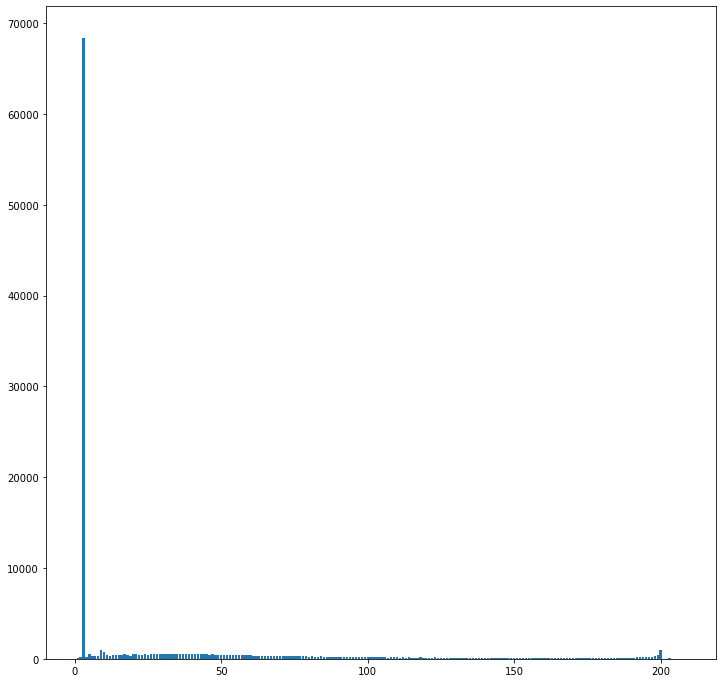

In [63]:
l2 = l.value_counts()
plt.figure(figsize=(12,12))
plt.bar(x=l2.index.values, height=l2)

In [64]:
l2

3      68429
200     1004
9        953
10       713
26       564
       ...  
202       20
207        1
206        1
205        1
208        1
Name: review_comment_message, Length: 208, dtype: int64

#### beaucoup de message à 3characters... Alors que la colonne est quasi vide... MAIS OUI LES NAN!
### N, A , N: 3 lettres pour une colonne quasi vide :D
#### Il faut évacuer les valeurs nulles et on pourra calculer convenablement

In [65]:
l = customer_study[customer_study["review_comment_message"].isnull()==False]
l = l.loc[:,["customer_unique_id", "review_comment_message"]] 
l["review_length"] = l.loc[:,"review_comment_message"].astype(str).map(len)
l = l.drop(columns=["review_comment_message"])
l

,customer_unique_id,review_length
4,345ecd01c38d18a9036ed96c73b8d066,45
5,4c93744516667ad3b8f1fb645a3116a4,16
8,1175e95fb47ddff9de6b2b06188f7e0d,25
9,9afe194fb833f79e300e37e580171f22,39
10,2a7745e1ed516b289ed9b29c7d0539a5,36
...,...,...
119134,4452b8ef472646c4cc042cb31a291f3b,17
119140,ca186065de6e2d01cfc99763e6d62048,5
119145,4b5820135d360a45552b5163835b1d89,121
119148,e9f50caf99f032f0bf3c55141f019d99,68


In [66]:
l = l.groupby(by="customer_unique_id").mean()
customer_feature = customer_feature.join(l, how="left", on="customer_unique_id")
del(l)
# customer_feature = customer_feature.rename(columns={0: "most_frequent_buying_hour"})
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher,freight_time,n_order_weekday,n_order_weekend,most_frequent_buying_day,most_frequent_buying_hour,product_description_lenght,mean_review_score,review_length
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27,7.83,164.37,0,21,0,0,0,14.9900,NaN,21.0,6,18,227.714286,1.0,75.0
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26,10.12,202.40,20,0,0,0,0,10.9900,20.0,NaN,3,15,452.000000,1.0,NaN
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85,14.44,288.80,0,20,0,0,0,10.1200,20.0,NaN,2,9,1042.000000,1.0,95.0
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88,18.75,1405.98,0,0,0,0,75,5.5776,75.0,NaN,1,20,254.400000,5.0,NaN
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91,12.70,304.90,0,24,0,0,0,5.7350,24.0,NaN,1,13,227.500000,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85,NaN,0.00,0,0,0,0,2,NaN,2.0,NaN,3,14,NaN,1.0,197.0
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN,3,0,NaN,1.0,10.0
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07,NaN,0.00,1,0,0,0,0,NaN,1.0,NaN,3,13,NaN,1.0,62.0
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN,0,9,NaN,1.0,NaN


#### WOUHOU C'ÉTAIT LA DERNIERE FEATURE QUI NOUS INTERESSAIT!
#### ON PEUT PASSER AU NETTOYAGE!

# 5/NETTOYAGE

#### Voyons voir à quoi ressemble notre table.

In [67]:
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher,freight_time,n_order_weekday,n_order_weekend,most_frequent_buying_day,most_frequent_buying_hour,product_description_lenght,mean_review_score,review_length
0,4546caea018ad8c692964e3382debd19,231.0,21,0,21,0,0,0,0,0,0,0,1.51,31.80,160.27,7.83,164.37,0,21,0,0,0,14.9900,NaN,21.0,6,18,227.714286,1.0,75.0
1,c402f431464c72e27330a67f7b94d4fb,210.0,20,0,0,0,0,20,0,0,0,0,100.00,2000.00,163.26,10.12,202.40,20,0,0,0,0,10.9900,20.0,NaN,3,15,452.000000,1.0,NaN
2,698e1cf81d01a3d389d96145f7fa6df8,210.0,20,20,0,0,0,0,0,0,0,0,98.70,1974.00,585.85,14.44,288.80,0,20,0,0,0,10.1200,20.0,NaN,2,9,1042.000000,1.0,95.0
3,9a736b248f67d166d2fbb006bcb877c3,138.0,75,0,0,0,75,0,0,0,0,0,37.97,2847.78,369.88,18.75,1405.98,0,0,0,0,75,5.5776,75.0,NaN,1,20,254.400000,5.0,NaN
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,135.0,24,0,0,0,24,0,0,0,0,0,66.38,1593.16,336.91,12.70,304.90,0,24,0,0,0,5.7350,24.0,NaN,1,13,227.500000,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,391d6062da3dd65b4de4524f28c478de,0.0,2,0,0,0,0,0,0,0,2,0,NaN,0.00,495.85,NaN,0.00,0,0,0,0,2,NaN,2.0,NaN,3,14,NaN,1.0,197.0
96092,962187a437025c984c621276aad55fb8,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,310.89,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN,3,0,NaN,1.0,10.0
96093,d04b8fd0acfc725ef9186b1e3d121cf0,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,617.07,NaN,0.00,1,0,0,0,0,NaN,1.0,NaN,3,13,NaN,1.0,62.0
96094,54975068b3fb2924fded7c27eb31b54f,0.0,1,0,0,0,0,0,0,0,1,0,NaN,0.00,168.09,NaN,0.00,0,1,0,0,0,NaN,1.0,NaN,0,9,NaN,1.0,NaN


#### Okay, elle est pas mal mais on pourrait avoir une vision plus globale?

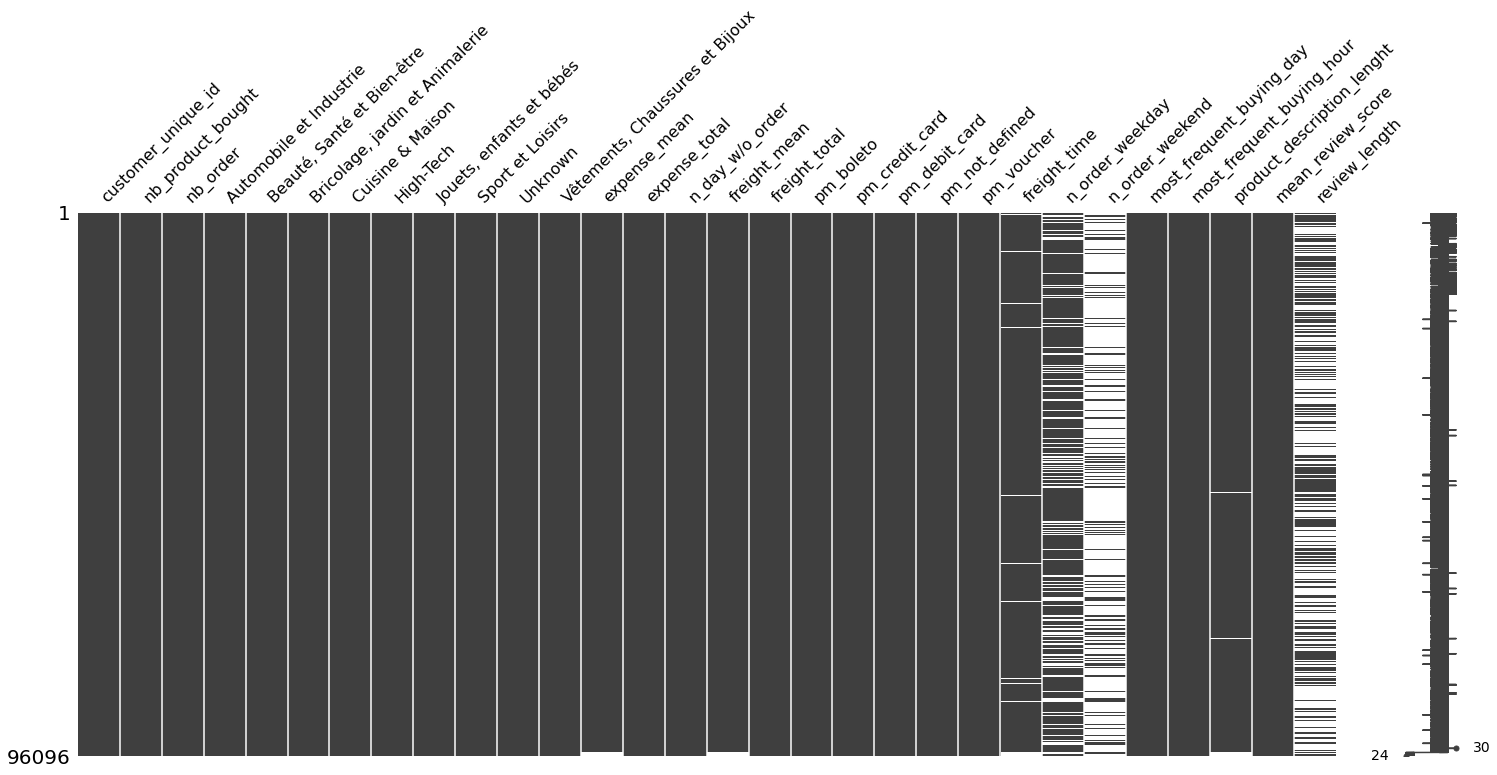

In [68]:
msno.matrix(customer_feature)

#### Hum c'est quand même pas mal vide sur certaines colonnes qu'on a nous même générées...
#### Remplissons les!

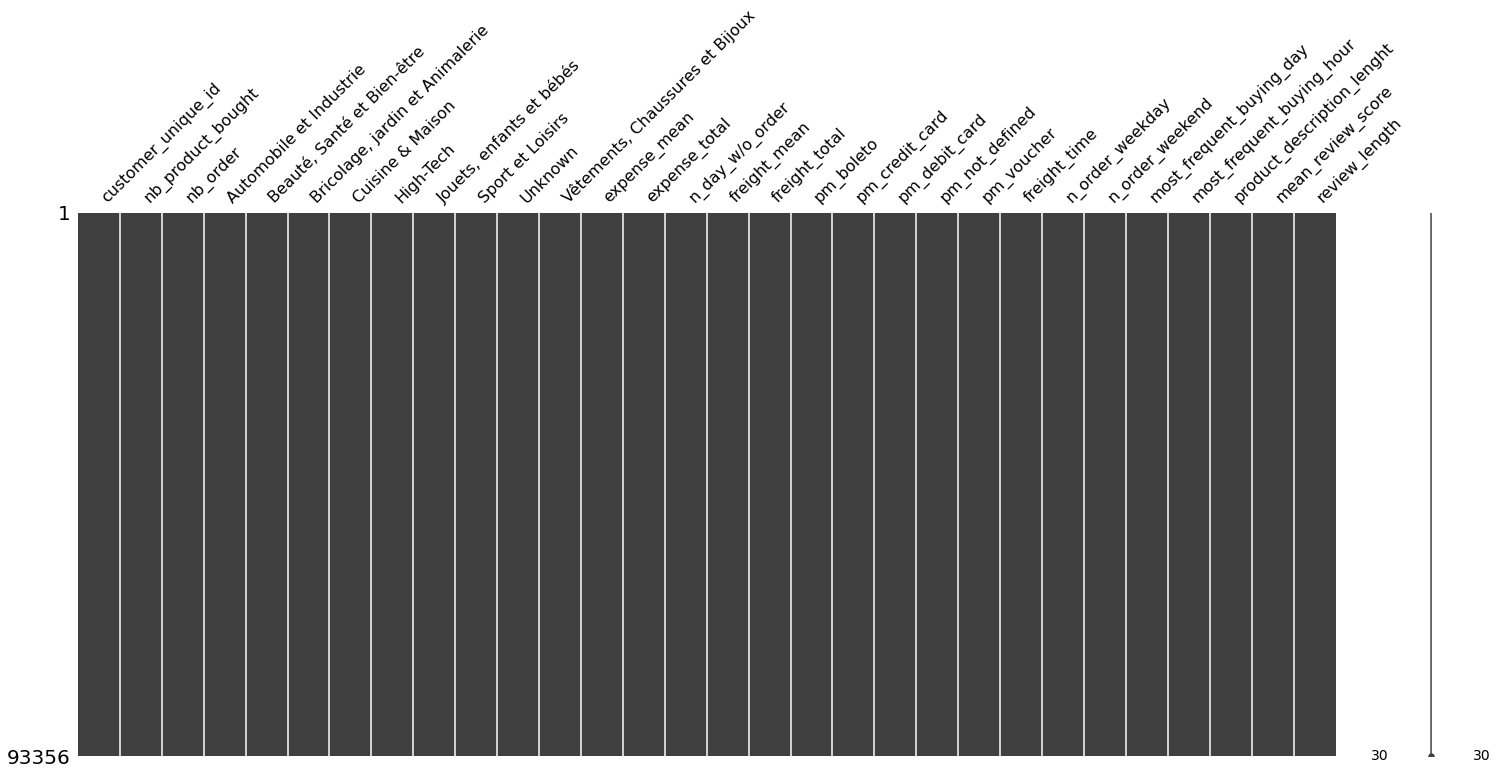

In [69]:
# On peut remplir par 0 sur ces valeurs sans au sens ou 
# on peut supposer que rien a été produit ou acheté
customer_feature["review_length"] = customer_feature["review_length"].fillna(0)
customer_feature["product_description_lenght"] = customer_feature["product_description_lenght"].fillna(0)
customer_feature["n_order_weekday"] = customer_feature["n_order_weekday"].fillna(0)
customer_feature["n_order_weekend"] = customer_feature["n_order_weekend"].fillna(0)
customer_feature["expense_mean"] = customer_feature["expense_mean"].fillna(0)
# On dropera les colonnes vides pour les autres
customer_feature = customer_feature.dropna()
msno.matrix(customer_feature)

#### C'est pas mal, mais reste-t'il vraiment 0 donnée nulle?

In [70]:
ratio_missing = customer_feature.apply(lambda x: x.isna().sum(), axis=0)
ratio_missing = round(ratio_missing*100/nrow, 2)
ratio_missing = ratio_missing.sort_values(ascending=False)
ratio_missing
# fig = plt.figure(figsize=(10,10))
# plt.xticks(rotation=90)
# plt.bar(x = ratio_missing.index, height=ratio_missing)

review_length                      0.0
mean_review_score                  0.0
nb_product_bought                  0.0
nb_order                           0.0
Automobile et Industrie            0.0
Beauté, Santé et Bien-être         0.0
Bricolage, jardin et Animalerie    0.0
Cuisine & Maison                   0.0
High-Tech                          0.0
Jouets, enfants et bébés           0.0
Sport et Loisirs                   0.0
Unknown                            0.0
Vêtements, Chaussures et Bijoux    0.0
expense_mean                       0.0
expense_total                      0.0
n_day_w/o_order                    0.0
freight_mean                       0.0
freight_total                      0.0
pm_boleto                          0.0
pm_credit_card                     0.0
pm_debit_card                      0.0
pm_not_defined                     0.0
pm_voucher                         0.0
freight_time                       0.0
n_order_weekday                    0.0
n_order_weekend          

#### Et oui!

## Gestion des outliers
#### A-t'on des outliers et comment allons nous y remédier? Observons la donnée tout d'abord

In [71]:
customer_feature.describe()
# Automobile et Industrie,Unknown,pm_debit_card,pm_not_defined

,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher,freight_time,n_order_weekday,n_order_weekend,most_frequent_buying_day,product_description_lenght,mean_review_score,review_length
count,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.00000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000,93356.000000
mean,1.485818,1.242341,0.051673,0.143376,0.095762,0.37492,0.230740,0.078367,0.141555,0.018928,0.107020,125.829131,148.845966,288.267639,20.185163,24.805541,0.241527,0.916256,0.017792,0.000011,0.066723,12.566675,0.960752,0.281589,2.794111,784.400838,4.138623,28.485035
std,2.590785,0.854288,0.283341,0.440710,0.415539,0.83236,0.558952,0.316823,0.439084,0.174343,0.375624,190.546339,245.977997,153.494987,15.708507,27.397798,0.581968,0.749751,0.154536,0.003273,0.567555,9.547898,0.916305,0.627265,2.007739,651.827610,1.292271,48.486010
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850000,0.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,42.900000,48.900000,163.860000,13.370000,14.100000,0.000000,1.000000,0.000000,0.000000,0.000000,6.790000,1.000000,0.000000,1.000000,348.000000,4.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,89.900000,268.930000,16.390000,17.710000,0.000000,1.000000,0.000000,0.000000,0.000000,10.230000,1.000000,0.000000,3.000000,603.000000,5.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,139.900000,159.900000,397.742500,21.190000,26.670000,0.000000,1.000000,0.000000,0.000000,0.000000,15.720000,1.000000,0.000000,4.000000,991.000000,5.000000,42.000000
max,231.000000,75.000000,24.000000,24.000000,35.000000,75.00000,24.000000,14.000000,21.000000,13.000000,12.000000,6735.000000,13440.000000,772.840000,409.680000,1794.960000,20.000000,24.000000,7.000000,1.000000,75.000000,209.630000,75.000000,38.000000,16.000000,3992.000000,5.000000,208.000000


<ipython-input-72-8bb7f2e3d198>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_feature['most_frequent_buying_hour'] = pd.to_numeric(customer_feature['most_frequent_buying_hour'])


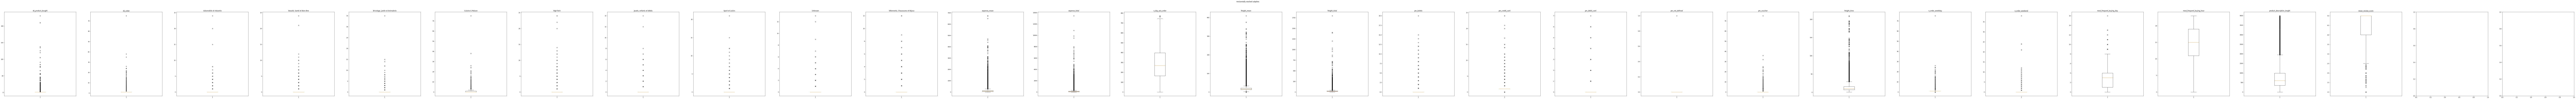

In [72]:
customer_feature['most_frequent_buying_hour'] = pd.to_numeric(customer_feature['most_frequent_buying_hour'])
n_plot = customer_feature.columns.size

fig, ax = plt.subplots(1, n_plot, figsize=(n_plot*12,12))
fig.suptitle('Horizontally stacked subplots')
for i in range(1,n_plot-1):
    ax[i-1].boxplot(customer_feature[customer_feature.columns[i]])
    ax[i-1].title.set_text(customer_feature.columns[i])
plt.show()

#### Les variables semblent très concentrées sur des valeurs plutôt petites et être dérangées par des outliers jusqu'à 150 fois plus grands

In [73]:
customer_feature = customer_feature[(np.abs(zscore(customer_feature.iloc[:,1:-4])) < 3).all(axis=1)]
customer_feature

,customer_unique_id,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher,freight_time,n_order_weekday,n_order_weekend,most_frequent_buying_day,most_frequent_buying_hour,product_description_lenght,mean_review_score,review_length
1823,f4769d07fbfa6b165ac06e843ce1e3da,6.0,3,0,0,0,2,0,1,0,0,0,52.63,157.90,356.77,13.36,40.07,0,3,0,0,0,4.19,3.0,0.0,0,7,2108.333333,3.0,96.0
2094,cc6a7c09092000c1485649d3cff4e0c3,6.0,3,0,0,1,2,0,0,0,0,0,63.79,191.36,70.26,14.38,43.13,0,3,0,0,0,4.45,3.0,0.0,3,2,660.000000,1.0,193.0
2218,0e34a60534391f19af7e10f1c8ac28d4,6.0,3,0,0,0,2,0,1,0,0,0,133.30,399.90,329.02,27.35,82.05,0,3,0,0,0,1.93,3.0,0.0,2,18,370.000000,2.0,25.0
2301,e1708ec558c8c1d8bd5e24d022cd13ce,6.0,3,0,0,0,2,0,0,1,0,0,71.83,215.50,125.35,13.98,41.95,0,3,0,0,0,6.06,3.0,0.0,1,17,2620.666667,4.0,36.0
2331,1fc8630d25cd738b571a0acc08c2eff7,6.0,3,0,0,1,2,0,0,0,0,0,68.25,204.75,739.63,13.44,40.32,0,3,0,0,0,6.79,3.0,0.0,0,22,1066.000000,5.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,5b8515d0ff29f6655acc9bb8341b443a,1.0,1,0,0,0,0,0,0,0,0,1,149.00,149.00,67.84,15.79,15.79,1,0,0,0,0,15.47,1.0,0.0,1,10,591.000000,5.0,86.0
95415,5b143240c381316b9b1dc332176b4a71,1.0,1,0,0,0,1,0,0,0,0,0,99.99,99.99,369.31,17.95,17.95,0,1,0,0,0,8.90,1.0,0.0,0,20,873.000000,5.0,0.0
95416,5afa58a8f5f4690413cfa9e809d551c1,1.0,1,0,0,1,0,0,0,0,0,0,59.90,59.90,317.08,12.48,12.48,0,1,0,0,0,8.26,0.0,1.0,6,12,341.000000,5.0,0.0
95417,5b131a24689b26c3e931c218a83c7568,1.0,1,0,1,0,0,0,0,0,0,0,19.80,19.80,335.21,7.88,7.88,0,1,0,0,0,1.95,1.0,0.0,0,16,483.000000,5.0,0.0


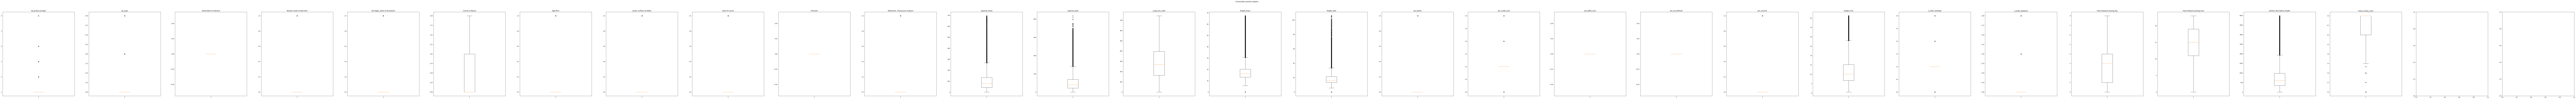

In [74]:
n_plot = customer_feature.columns.size
fig, ax = plt.subplots(1, n_plot, figsize=(n_plot*12,12))
fig.suptitle('Horizontally stacked subplots')
for i in range(1,n_plot-1):
    ax[i-1].boxplot(customer_feature[customer_feature.columns[i]])
    ax[i-1].title.set_text(customer_feature.columns[i])
plt.show()

In [75]:
customer_feature.describe()

,nb_product_bought,nb_order,Automobile et Industrie,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,Unknown,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_debit_card,pm_not_defined,pm_voucher,freight_time,n_order_weekday,n_order_weekend,most_frequent_buying_day,most_frequent_buying_hour,product_description_lenght,mean_review_score,review_length
count,72869.000000,72869.000000,72869.0,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.0,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.0,72869.0,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000
mean,1.075437,1.046453,0.0,0.131935,0.071512,0.337620,0.207372,0.074627,0.125389,0.0,0.097998,105.864408,109.733043,288.052235,18.467057,19.302028,0.201046,0.827965,0.0,0.0,0.017442,11.856316,0.801919,0.244535,2.783927,14.796882,778.952174,4.225279,26.232225
std,0.362065,0.214022,0.0,0.338423,0.257680,0.544096,0.405427,0.262790,0.331162,0.0,0.297314,98.612238,101.789047,153.304075,9.581959,10.692352,0.400785,0.471790,0.0,0.0,0.130913,7.352889,0.477076,0.452825,1.980593,5.330308,635.584102,1.211086,46.298111
min,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.850000,0.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.530000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000
25%,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,42.900000,44.900000,163.690000,13.190000,13.440000,0.000000,1.000000,0.0,0.0,0.000000,6.690000,1.000000,0.000000,1.000000,11.000000,348.000000,4.000000,0.000000
50%,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,78.990000,79.900000,269.000000,16.180000,16.510000,0.000000,1.000000,0.0,0.0,0.000000,10.110000,1.000000,0.000000,3.000000,15.000000,600.000000,5.000000,0.000000
75%,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,132.910000,139.900000,397.170000,20.190000,21.480000,0.000000,1.000000,0.0,0.0,0.000000,15.240000,1.000000,0.000000,4.000000,19.000000,982.000000,5.000000,38.000000
max,6.000000,3.000000,0.0,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.0,1.000000,695.900000,836.900000,743.850000,67.310000,105.870000,1.000000,3.000000,0.0,0.0,1.000000,41.210000,3.000000,2.000000,8.000000,23.000000,3985.000000,5.000000,208.000000


### Certaines variables ne seront pas utiles

In [76]:
customer_feature = customer_feature.drop(columns=['Unknown', 'pm_not_defined'])
customer_feature = customer_feature.drop(columns=['Automobile et Industrie', 'pm_debit_card'])

#### Nous voilà débarassés des outliers et colonnes vides ou douteuses, on peut sauvegarder la donnée à ce stade, elle nous sera utile sous cette forme

In [77]:
customer_feature.to_csv('customer_feature_notscaled')

# 6/ Normalisation des données en vue des futures manipulations

In [78]:
# scaler = MinMaxScaler()
# scaler = RobustScaler()
scaler = StandardScaler()
customer_feature.iloc[:,1:] = scaler.fit_transform(customer_feature.iloc[:,1:])

In [79]:
customer_feature.describe()

,nb_product_bought,nb_order,"Beauté, Santé et Bien-être","Bricolage, jardin et Animalerie",Cuisine & Maison,High-Tech,"Jouets, enfants et bébés",Sport et Loisirs,"Vêtements, Chaussures et Bijoux",expense_mean,expense_total,n_day_w/o_order,freight_mean,freight_total,pm_boleto,pm_credit_card,pm_voucher,freight_time,n_order_weekday,n_order_weekend,most_frequent_buying_day,most_frequent_buying_hour,product_description_lenght,mean_review_score,review_length
count,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000,72869.000000
mean,0.015087,0.023227,0.131935,0.071512,0.168810,0.207372,0.074627,0.125389,0.097998,0.151089,0.130235,0.387245,0.274358,0.182318,0.201046,0.275988,0.017442,0.278425,0.267306,0.122267,0.347991,0.643343,0.194663,0.806320,0.126116
std,0.072413,0.107011,0.338423,0.257680,0.272048,0.405427,0.262790,0.331162,0.297314,0.141878,0.121750,0.206095,0.142356,0.100995,0.400785,0.157263,0.130913,0.180749,0.159025,0.226413,0.247574,0.231753,0.159654,0.302771,0.222587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060499,0.052688,0.220058,0.195959,0.126948,0.000000,0.333333,0.000000,0.151426,0.333333,0.000000,0.125000,0.478261,0.086410,0.750000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112424,0.094552,0.361632,0.240380,0.155946,0.000000,0.333333,0.000000,0.235497,0.333333,0.000000,0.375000,0.652174,0.149711,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.190001,0.166318,0.533938,0.299955,0.202890,0.000000,0.333333,0.000000,0.361603,0.333333,0.000000,0.500000,0.826087,0.245667,1.000000,0.182692
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
customer_feature.to_csv('customer_feature')